# Library Imports

In [1]:
# Data 
import pandas as pd
import numpy as np
import re
import math

# Dataviz
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


#Text
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.decomposition import TruncatedSVD


#Images
import cv2
from PIL import Image, ImageFilter, ImageOps, ImageEnhance, ImageDraw, ImageFont
import shutil
from concurrent.futures import ThreadPoolExecutor
import time


# Models
from ultralytics import YOLO
import pytesseract


import os
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import concurrent.futures

import threading



# YOLO11 v9i Pretrained Model

In [2]:
model = YOLO('yolo11n_v9iTrained.pt')

# Loading Dataframes

In [3]:
csv_file_path = 'C:\\Users\\arado\\Desktop\\Items from FULLSTACK\\goodreads_cleaned.csv'

goodReads = pd.read_csv(csv_file_path)
goodReads.head()
title_author = goodReads.drop(labels =['average_rating','num_ratings'], axis = 1)
title_author
title_author['AuthorTitleString'] = title_author['bookTitle'].astype(str) + " "+title_author['authorName'].astype(str)
title_author_array = title_author['AuthorTitleString'].values


title_author_array


print('\n ~ title_author Head~ \n', title_author.head(10))
print('\n~Info~\n')
title_author.info()
title_author.AuthorTitleString.head()
title_author#.to_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//title_author.csv")


 ~ title_author Head~ 
                                            bookTitle       authorName  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne Collins   
1  Harry Potter and the Order of the Phoenix (Har...     J.K. Rowling   
2                                Pride and Prejudice      Jane Austen   
3                              To Kill a Mockingbird       Harper Lee   
4                                     The Book Thief     Markus Zusak   
5                   Twilight (The Twilight Saga, #1)  Stephenie Meyer   
6                                        Animal Farm    George Orwell   
7  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   J.R.R. Tolkien   
8  The Chronicles of Narnia (The Chronicles of Na...       C.S. Lewis   
9                             The Fault in Our Stars       John Green   

                                   AuthorTitleString  
0  The Hunger Games (The Hunger Games, #1) Suzann...  
1  Harry Potter and the Order of the Phoenix (Har...  
2     

,bookTitle,authorName,AuthorTitleString
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"The Hunger Games (The Hunger Games, #1) Suzann..."
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...
2,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen
3,To Kill a Mockingbird,Harper Lee,To Kill a Mockingbird Harper Lee
4,The Book Thief,Markus Zusak,The Book Thief Markus Zusak
...,...,...,...
9995,The Company,Robert Littell,The Company Robert Littell
9996,Thanks for the Trouble,Tommy Wallach,Thanks for the Trouble Tommy Wallach
9997,10 Dates,Emily James,10 Dates Emily James
9998,The Heights of Perdition (The Divine Space Pir...,C.S. Johnson,The Heights of Perdition (The Divine Space Pir...


In [4]:
csv_file_path = 'C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\CSV Recatngle shelf and book annotations\\Kaggle Rec Files\\Books.csv'

books_df = pd.read_csv(csv_file_path)
books_df = books_df.dropna()

print('\n ~Books Head~ \n', books_df.head(10))
print('\n~Info~\n')
books_df.info()


 ~Books Head~ 
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   
5  0399135782                             The Kitchen God's Wife   
6  0425176428  What If?: The World's Foremost Military Histor...   
7  0671870432                                    PLEADING GUILTY   
8  0679425608  Under the Black Flag: The Romance and the Real...   
9  074322678X            Where You'll Find Me: And Other Stories   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2        

C:\Users\arado\AppData\Local\Temp\ipykernel_4116\3040102906.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(csv_file_path)


In [5]:
csv_file_path = 'C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\CSV Recatngle shelf and book annotations\\Kaggle Rec Files\\Ratings.csv'


ratings_df = pd.read_csv(csv_file_path)
ratings_df = ratings_df.dropna()

ratings_df.describe()

print('\n ~Ratings Head~ \n', ratings_df.head(10))
print('\n~Info~\n')
ratings_df.info()


 ~Ratings Head~ 
    User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
5   276733  2080674722            0
6   276736  3257224281            8
7   276737  0600570967            6
8   276744  038550120X            7
9   276745   342310538           10

~Info~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
csv_file_path = 'C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\CSV Recatngle shelf and book annotations\\Kaggle Rec Files\\Users.csv'

users_df = pd.read_csv(csv_file_path)
users_df = users_df.dropna()


print('\n ~Users Head~ \n', users_df.head(10))
print('\n~Info~\n')
users_df.info()
users_df['User-ID']


 ~Users Head~ 
     User-ID                                Location   Age
1         2               stockton, california, usa  18.0
3         4               porto, v.n.gaia, portugal  17.0
5         6           santa monica, california, usa  61.0
9        10              albacete, wisconsin, spain  26.0
10       11          melbourne, victoria, australia  14.0
12       13             barcelona, barcelona, spain  26.0
17       18  rio de janeiro, rio de janeiro, brazil  25.0
18       19                               weston, ,  14.0
19       20            langhorne, pennsylvania, usa  19.0
20       21          ferrol / spain, alabama, spain  46.0

~Info~

<class 'pandas.core.frame.DataFrame'>
Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   168096 non-null  int64  
 1   Location  168096 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), o

1              2
3              4
5              6
9             10
10            11
           ...  
278848    278849
278850    278851
278851    278852
278852    278853
278854    278855
Name: User-ID, Length: 168096, dtype: int64

In [7]:
g = users_df.merge(ratings_df, how='left', on='User-ID')

g['Location_Country'] = g['Location'].apply(lambda x: x.split(',')[-1]).astype('string')  # Extract Country
g['Location_City'] = g['Location'].apply(lambda x: x.split(',')[0]).astype('string')      # Extract City

g

,User-ID,Location,Age,ISBN,Book-Rating,Location_Country,Location_City
0,2,"stockton, california, usa",18.0,0195153448,0.0,usa,stockton
1,4,"porto, v.n.gaia, portugal",17.0,NaN,NaN,portugal,porto
2,6,"santa monica, california, usa",61.0,NaN,NaN,usa,santa monica
3,10,"albacete, wisconsin, spain",26.0,1841721522,0.0,spain,albacete
4,10,"albacete, wisconsin, spain",26.0,8477024456,6.0,spain,albacete
...,...,...,...,...,...,...,...
946272,278851,"dallas, texas, usa",33.0,1569661057,10.0,usa,dallas
946273,278851,"dallas, texas, usa",33.0,1885071213,7.0,usa,dallas
946274,278852,"brisbane, queensland, australia",32.0,0449907597,8.0,australia,brisbane
946275,278853,"stranraer, n/a, united kingdom",17.0,NaN,NaN,united kingdom,stranraer


In [8]:
b = books_df.merge(g, how='left', on='ISBN')
b.dropna(inplace=True)
b = b.set_index('User-ID').drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)


b['Label Encoded ISBN'] = b['ISBN']
b['Label Encoded Book-Author'] = b['Book-Author']
b['Label Encoded Publisher'] = b['Publisher']
b['Label Encoded Location'] = b['Location']
b['Label Encoded Book-Title'] = b['Book-Title']
b['Label Encoded Location_Country'] = b['Location_Country']
b['Label Encoded Location_City'] = b['Location_City']

le = LabelEncoder()
b['Label Encoded ISBN']  = le.fit_transform(b['ISBN'])
b['Label Encoded Book-Author']  = le.fit_transform(b['Book-Author'])
b['Label Encoded Publisher']  = le.fit_transform(b['Publisher'])
b['Label Encoded Location']  = le.fit_transform(b['Location'])
b['Label Encoded Book-Title']  = le.fit_transform(b['Book-Title'])
b['Label Encoded Location_Country']  = le.fit_transform(b['Location_Country'])
b['Label Encoded Location_City']  = le.fit_transform(b['Location_City'])


b = b.reset_index()
b = b.set_index('Label Encoded Book-Author').sort_index(ascending=True)
LabelEncoded_Book_Author = b['Book-Author']

b = b.reset_index()
b = b.set_index('Label Encoded Publisher').sort_index(ascending=True)
LabelEncoded_Publisher = b['Publisher']

b = b.reset_index()
b = b.set_index('Label Encoded Location').sort_index(ascending=True)
LabelEncoded_Location = b['Location']

b = b.reset_index()
b = b.set_index('Label Encoded Book-Title').sort_index(ascending=True)
LabelEncoded_Book_Title = b['Book-Title']


b = b.reset_index()
b = b.set_index('Label Encoded Location_Country').sort_index(ascending=True)
LabelEncoded_Year_Of_Publication = b['Location_Country']

b = b.reset_index()
b = b.set_index('Label Encoded Location_City').sort_index(ascending=True)
LabelEncoded_Year_Of_Publication = b['Location_City']

b = b.reset_index()
b = b.set_index('Label Encoded ISBN').sort_index(ascending=True)
LabelEncoded_ISBN = b['ISBN']

b = b.reset_index()

b.head()

,Label Encoded ISBN,Label Encoded Location_City,Label Encoded Location_Country,Label Encoded Book-Title,Label Encoded Location,Label Encoded Publisher,Label Encoded Book-Author,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Book-Rating,Location_Country,Location_City
0,0,10034,33,181377,14368,11853,10201,171118.0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,"toronto, ontario, canada",47.0,8.0,canada,toronto
1,1,3274,193,103847,4737,2812,44427,209516.0,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,"felixstowe, suffolk, united kingdom",57.0,0.0,united kingdom,felixstowe
2,2,5607,193,190608,8035,5791,32011,196149.0,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,"lisburn, northern ireland, united kingdom",29.0,0.0,united kingdom,lisburn
3,3,5681,193,172940,8162,12958,60909,206300.0,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,"london, england, united kingdom",34.0,0.0,united kingdom,london
4,4,6147,14,100283,8901,12956,38917,246671.0,0001047663,Matter Of Honour,Jeffrey Archer,2000,Trafalgar Square Books,"melbourne, victoria, australia",27.0,0.0,australia,melbourne


In [9]:
b.describe()

,Label Encoded ISBN,Label Encoded Location_City,Label Encoded Location_Country,Label Encoded Book-Title,Label Encoded Location,Label Encoded Publisher,Label Encoded Book-Author,User-ID,Age,Book-Rating
count,753295.000000,753295.000000,753295.000000,753295.000000,753295.000000,753295.000000,753295.000000,753295.000000,753295.000000,753295.000000
mean,98498.013801,5776.147846,168.637507,104952.921279,8321.159329,7400.648320,43766.937315,141231.310485,37.397669,2.768886
std,59796.184565,3188.630239,62.182001,59678.027209,4566.722907,4386.896829,25283.548536,78828.596534,14.098263,3.864225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,52920.000000,2990.000000,193.000000,53177.000000,4344.000000,3414.000000,21555.000000,74453.000000,28.000000,0.000000
50%,89031.000000,5990.000000,200.000000,108207.000000,8665.000000,7463.000000,43859.000000,141493.000000,35.000000,0.000000
75%,140863.500000,8490.000000,200.000000,157936.500000,12248.000000,11474.000000,65345.000000,209156.000000,45.000000,7.000000
max,228994.000000,11276.000000,211.000000,205168.000000,16155.000000,14499.000000,87234.000000,278852.000000,244.000000,10.000000


In [10]:
b

,Label Encoded ISBN,Label Encoded Location_City,Label Encoded Location_Country,Label Encoded Book-Title,Label Encoded Location,Label Encoded Publisher,Label Encoded Book-Author,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Book-Rating,Location_Country,Location_City
0,0,10034,33,181377,14368,11853,10201,171118.0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,"toronto, ontario, canada",47.0,8.0,canada,toronto
1,1,3274,193,103847,4737,2812,44427,209516.0,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,"felixstowe, suffolk, united kingdom",57.0,0.0,united kingdom,felixstowe
2,2,5607,193,190608,8035,5791,32011,196149.0,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,"lisburn, northern ireland, united kingdom",29.0,0.0,united kingdom,lisburn
3,3,5681,193,172940,8162,12958,60909,206300.0,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,"london, england, united kingdom",34.0,0.0,united kingdom,london
4,4,6147,14,100283,8901,12956,38917,246671.0,0001047663,Matter Of Honour,Jeffrey Archer,2000,Trafalgar Square Books,"melbourne, victoria, australia",27.0,0.0,australia,melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753290,228990,7934,150,54702,11456,3848,82832,264317.0,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,"portela de sacavém, loures, portugal",25.0,0.0,portugal,portela de sacavém
753291,228991,8938,200,80334,12875,7151,39011,100906.0,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,"seattle, washington, usa",34.0,0.0,usa,seattle
753292,228992,1459,193,64970,2174,13533,23240,100088.0,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,"burnley, england, united kingdom",26.0,0.0,united kingdom,burnley
753293,228993,9767,14,151734,14008,3554,44733,179791.0,B0002JV9PY,The Blockade Runners,Jules Verne,0,Digireads.com,"sydney, new south wales, australia",22.0,0.0,australia,sydney


In [11]:
b['AuthorTitleString'] = b['Book-Title'].astype(str) + " "+b['Book-Author'].astype(str)
#title_author

merged_df = pd.merge(title_author, b, on='AuthorTitleString', how='inner')

merged_df.drop(['Label Encoded Location_Country','Location_Country'], axis=1, inplace=True)
merged_df#.to_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//merged_df.csv")

,bookTitle,authorName,AuthorTitleString,Label Encoded ISBN,Label Encoded Location_City,Label Encoded Book-Title,Label Encoded Location,Label Encoded Publisher,Label Encoded Book-Author,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Book-Rating,Location_City
0,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,6147,122039,8901,9900,37244,169564.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"melbourne, victoria, australia",21.0,8.0,melbourne
1,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,5916,122039,8547,9900,37244,28146.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"manchester, england, n/a, united kingdom",30.0,4.0,manchester
2,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,4536,122039,6486,9900,37244,205383.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"hucknall, nottinghamshire, united kingdom",36.0,0.0,hucknall
3,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,7162,122039,10355,9900,37244,244892.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"nottingham, nottinghamshire, united kingdom",34.0,0.0,nottingham
4,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,7970,122039,11523,9900,37244,238864.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"powys, wales, united kingdom",32.0,10.0,powys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,18946,5916,132615,8556,5699,56748,233941.0,0152045694,Scribbler of Dreams,Mary E. Pearson,2002,Harcourt Paperbacks,"manchester, michigan, usa",15.0,9.0,manchester
50773,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,18946,10524,132615,15067,5699,56748,240700.0,0152045694,Scribbler of Dreams,Mary E. Pearson,2002,Harcourt Paperbacks,"waldorf, maryland, usa",15.0,7.0,waldorf
50774,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,19010,6772,132615,9800,5706,56748,55073.0,0152166629,Scribbler of Dreams,Mary E. Pearson,2001,"Harcourt, Inc.","napa, california, usa",14.0,8.0,napa
50775,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,19010,10288,132615,14753,5706,56748,264688.0,0152166629,Scribbler of Dreams,Mary E. Pearson,2001,"Harcourt, Inc.","valley, alabama, usa",2.0,10.0,valley


In [12]:
b['AuthorTitleString'].unique()

array(['The Way Things Work: An Illustrated Encyclopedia of Technology C. van Amerongen (translator)', "Mog's Christmas Judith Kerr", 'Twopence to Cross the Mersey Helen Forrester', ..., 'Good Wife Strikes Back, The Elizabeth Buchan', 'The Blockade Runners Jules Verne', 'The Underground City Jules Verne'],
      dtype=object)

In [13]:
b = b.dropna()

In [14]:
merged_df['AuthorTitleString'].unique()

array(['Pride and Prejudice Jane Austen', 'To Kill a Mockingbird Harper Lee', 'Animal Farm George Orwell', ..., 'Double Standards Judith McNaught', 'The Goal: A Process of Ongoing Improvement Eliyahu M. Goldratt', 'Scribbler of Dreams Mary E. Pearson'], dtype=object)

# Start Here for filtering

In [15]:
b
merged_df

,bookTitle,authorName,AuthorTitleString,Label Encoded ISBN,Label Encoded Location_City,Label Encoded Book-Title,Label Encoded Location,Label Encoded Publisher,Label Encoded Book-Author,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Book-Rating,Location_City
0,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,6147,122039,8901,9900,37244,169564.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"melbourne, victoria, australia",21.0,8.0,melbourne
1,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,5916,122039,8547,9900,37244,28146.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"manchester, england, n/a, united kingdom",30.0,4.0,manchester
2,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,4536,122039,6486,9900,37244,205383.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"hucknall, nottinghamshire, united kingdom",36.0,0.0,hucknall
3,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,7162,122039,10355,9900,37244,244892.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"nottingham, nottinghamshire, united kingdom",34.0,0.0,nottingham
4,Pride and Prejudice,Jane Austen,Pride and Prejudice Jane Austen,14749,7970,122039,11523,9900,37244,238864.0,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd,"powys, wales, united kingdom",32.0,10.0,powys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,18946,5916,132615,8556,5699,56748,233941.0,0152045694,Scribbler of Dreams,Mary E. Pearson,2002,Harcourt Paperbacks,"manchester, michigan, usa",15.0,9.0,manchester
50773,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,18946,10524,132615,15067,5699,56748,240700.0,0152045694,Scribbler of Dreams,Mary E. Pearson,2002,Harcourt Paperbacks,"waldorf, maryland, usa",15.0,7.0,waldorf
50774,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,19010,6772,132615,9800,5706,56748,55073.0,0152166629,Scribbler of Dreams,Mary E. Pearson,2001,"Harcourt, Inc.","napa, california, usa",14.0,8.0,napa
50775,Scribbler of Dreams,Mary E. Pearson,Scribbler of Dreams Mary E. Pearson,19010,10288,132615,14753,5706,56748,264688.0,0152166629,Scribbler of Dreams,Mary E. Pearson,2001,"Harcourt, Inc.","valley, alabama, usa",2.0,10.0,valley


In [16]:
c = pd.DataFrame({'User-ID':[], 'Book-Rating':[], 'Label Encoded Book-Author':[]})
c['User-ID'] = b['User-ID'].astype('int')
c['Book-Rating'] = b['Book-Rating'].astype('int')
c['Label Encoded Book-Author'] = b['Label Encoded Book-Author'].astype('int')
c.dtypes
c

,User-ID,Book-Rating,Label Encoded Book-Author
0,171118,8,10201
1,209516,0,44427
2,196149,0,32011
3,206300,0,60909
4,246671,0,38917
...,...,...,...
753290,264317,0,82832
753291,100906,0,39011
753292,100088,0,23240
753293,179791,0,44733


In [17]:
c0 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c0.csv")
c1 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c1.csv")
c2 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c2.csv")
c3 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c2.csv")
c4 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c4.csv")
c5 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c5.csv")
c6 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c6.csv")
c7 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c7.csv")
c8 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c8.csv")
c9 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c9.csv")
c10 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c10.csv")
c11 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c11.csv")
c12 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c12.csv")
c13 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c13.csv")
c14 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c14.csv")
c15 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c15.csv")
c16 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c16.csv")
c17 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c17.csv")
c18 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c18.csv")
c19 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//c19.csv")
cs = [c0, c1, c2, c2, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19]

# Preping Book Recomendations

In [18]:
makeNewHeatmaps = False

In [19]:
User_Item_df = merged_df.pivot_table(
    index='Label Encoded Book-Author',
    columns='User-ID',
    values='Book-Rating',
    aggfunc='mean'  # or 'sum', 'max', etc. 
)


User_Item_df_c0 = c0.pivot_table(
    index='Label Encoded Book-Author',
    columns='User-ID',
    values='Book-Rating',
    aggfunc='mean',  # or 'sum', 'max', etc. 
)

In [20]:
User_Item_df
User_Item_df_c0

User-ID,165,190,212,215,250,254,272,387,388,433,...,278422,278474,278540,278550,278554,278672,278692,278843,278846,278851
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
User_Item_df

User-ID,42.0,67.0,75.0,99.0,114.0,165.0,183.0,242.0,254.0,272.0,...,278554.0,278586.0,278653.0,278683.0,278720.0,278781.0,278796.0,278843.0,278844.0,278846.0
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
User_Item_df = User_Item_df.T

In [23]:
User_Item_df.head()

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86485,86559,86785,86799,86822,86842,86920,87018,87087,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
if makeNewHeatmaps:
    plt.figure(figsize=(9,9))
    sns.heatmap(data=User_Item_df, annot=False, robust=True)
    plt.xticks(rotation=60, ha='right')  # Rotates x-axis labels for better readability
    plt.title("User-Item Before SVD Conversions")
    plt.tight_layout()

In [25]:
'''
SVD has a time complexity of 𝑂(𝑛𝑚𝑘), 
where n is the number of users, 
m is the number of items, 
and 𝑘 is the number of latent factors. 
For reasonable values of 𝑘
k (e.g., 20 to 100), matrix factorization can be significantly faster, especially when the number of users and items is large.
'''

# Step 1: Fill NaN with 0 or some other placeholder
User_Item_filled = User_Item_df.fillna(0)

# Step 2: Apply Truncated SVD to reduce dimensionality
n_components = 20  # Number of latent features 
svd = TruncatedSVD(n_components=n_components)
user_latent = svd.fit_transform(User_Item_filled)

# Step 3: Reconstruct the original matrix using the latent features
User_Item_reconstructed = np.dot(user_latent, svd.components_)

# Convert the reconstructed matrix back to a DataFrame
User_Item__reconstructed_df = pd.DataFrame(User_Item_reconstructed, index=User_Item_df.index, columns=User_Item_df.columns)

# Step 4: Replace original NaN values with the reconstructed values
UBCF_User_Item_df = User_Item_df.copy()

# Only fill NaN values with reconstructed values
UBCF_User_Item_df = UBCF_User_Item_df.where(~UBCF_User_Item_df.isna(), User_Item_reconstructed)

In [26]:
UBCF_User_Item_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86485,86559,86785,86799,86822,86842,86920,87018,87087,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,-0.000056,0.000104,-0.000179,0.000770,1.564524e-15,0.001342,-3.010787e-17,0.001015,-0.000138,0.000046,...,0.002409,0.0,1.760834e-14,0.046013,-0.000137,-0.000119,-0.000792,-0.000582,0.0,-0.000725
67.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
99.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
114.0,-0.007625,-0.003544,-0.000074,0.006850,3.754157e-14,-0.001612,-2.374308e-16,0.030774,-0.007145,-0.000018,...,-0.008292,0.0,-1.025667e-13,0.000111,-0.003748,-0.001554,0.005018,-0.003938,0.0,0.041153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
278796.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
278843.0,0.042453,0.006523,-0.002129,0.079973,-1.903677e-13,-0.004851,2.454108e-16,0.004482,-0.013590,0.001120,...,0.158494,0.0,3.741542e-12,-0.214685,0.025282,-0.002052,0.009398,-0.008305,0.0,0.034577


In [27]:
UBCF_User_Item_df = UBCF_User_Item_df.T

In [28]:
UBCF_User_Item_df

User-ID,42.0,67.0,75.0,99.0,114.0,165.0,183.0,242.0,254.0,272.0,...,278554.0,278586.0,278653.0,278683.0,278720.0,278781.0,278796.0,278843.0,278844.0,278846.0
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,-5.626563e-05,0.0,0.0,0.0,-7.625001e-03,-4.236112e-03,2.420064e-04,2.151168e-04,6.999968e-02,-1.290727e-04,...,2.446177e-02,-4.244669e-03,-5.093603e-03,9.000116e-04,1.490573e-03,0.0,0.0,4.245296e-02,-8.884042e-03,7.651838e-03
725,1.035729e-04,0.0,0.0,0.0,-3.543931e-03,-1.968851e-03,1.958652e-05,1.741024e-05,4.021455e-02,2.187691e-06,...,-8.030839e-03,-1.934992e-03,-2.321990e-03,-7.277481e-05,-1.440504e-04,0.0,0.0,6.523389e-03,-2.406537e-03,1.388014e-03
823,-1.787766e-04,0.0,0.0,0.0,-7.381554e-05,-4.100863e-05,-9.177817e-06,-8.158060e-06,3.041072e-02,1.913392e-04,...,-2.703603e-03,1.216885e-04,1.460262e-04,-2.903130e-04,1.956794e-04,0.0,0.0,-2.128865e-03,-9.093080e-04,3.707488e-03
934,7.699043e-04,0.0,0.0,0.0,6.849925e-03,3.805514e-03,9.186669e-03,8.165928e-03,7.269183e-02,2.199029e-03,...,9.187622e-02,1.472170e-02,1.766604e-02,3.120564e-03,5.966242e-03,0.0,0.0,7.997261e-02,1.824562e-02,2.983439e-02
1134,1.564524e-15,0.0,0.0,0.0,3.754157e-14,2.085643e-14,-5.229347e-15,-4.648308e-15,3.170302e-14,3.299113e-15,...,-6.665282e-14,1.535065e-14,1.842078e-14,-5.813582e-15,-7.983661e-15,0.0,0.0,-1.903677e-13,7.395293e-14,-1.315237e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86842,-1.185133e-04,0.0,0.0,0.0,-1.554380e-03,-8.635445e-04,3.431329e-04,3.050070e-04,9.793840e-02,-1.294952e-04,...,3.916162e-03,-1.067644e-03,-1.281173e-03,-6.434770e-05,6.008245e-04,0.0,0.0,-2.052312e-03,-3.675296e-03,1.109300e-02
86920,-7.917238e-04,0.0,0.0,0.0,5.018348e-03,2.787971e-03,1.611174e-03,1.432155e-03,3.765762e-02,2.435094e-04,...,6.579503e-03,-4.012169e-03,-4.814603e-03,5.705871e-04,2.205379e-03,0.0,0.0,9.397877e-03,1.490339e-03,8.824330e-03
87018,-5.821495e-04,0.0,0.0,0.0,-3.937872e-03,-2.187707e-03,-2.346118e-04,-2.085438e-04,-1.627014e-02,6.955313e-04,...,-3.111068e-03,-1.383531e-03,-1.660237e-03,-6.533726e-05,2.666099e-04,0.0,0.0,-8.305320e-03,-3.225884e-03,-9.336316e-05


In [29]:
if makeNewHeatmaps:   
    plt.figure(figsize=(9,9))
    sns.heatmap(data=UBCF_User_Item_df, annot=False, robust=True)
    plt.xticks(rotation=60, ha='right')  # Rotates x-axis labels for better readability
    plt.title('UBCF User Item DataFrame - After SVD Conversion')
    plt.tight_layout()

In [30]:
UBCF_User_Item_df = UBCF_User_Item_df.T

In [31]:
UBCF_User_Item_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86485,86559,86785,86799,86822,86842,86920,87018,87087,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,-0.000056,0.000104,-0.000179,0.000770,1.564524e-15,0.001342,-3.010787e-17,0.001015,-0.000138,0.000046,...,0.002409,0.0,1.760834e-14,0.046013,-0.000137,-0.000119,-0.000792,-0.000582,0.0,-0.000725
67.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
99.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
114.0,-0.007625,-0.003544,-0.000074,0.006850,3.754157e-14,-0.001612,-2.374308e-16,0.030774,-0.007145,-0.000018,...,-0.008292,0.0,-1.025667e-13,0.000111,-0.003748,-0.001554,0.005018,-0.003938,0.0,0.041153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
278796.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
278843.0,0.042453,0.006523,-0.002129,0.079973,-1.903677e-13,-0.004851,2.454108e-16,0.004482,-0.013590,0.001120,...,0.158494,0.0,3.741542e-12,-0.214685,0.025282,-0.002052,0.009398,-0.008305,0.0,0.034577


In [32]:
UBCF_User_Item_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86485,86559,86785,86799,86822,86842,86920,87018,87087,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,-0.000056,0.000104,-0.000179,0.000770,1.564524e-15,0.001342,-3.010787e-17,0.001015,-0.000138,0.000046,...,0.002409,0.0,1.760834e-14,0.046013,-0.000137,-0.000119,-0.000792,-0.000582,0.0,-0.000725
67.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
99.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
114.0,-0.007625,-0.003544,-0.000074,0.006850,3.754157e-14,-0.001612,-2.374308e-16,0.030774,-0.007145,-0.000018,...,-0.008292,0.0,-1.025667e-13,0.000111,-0.003748,-0.001554,0.005018,-0.003938,0.0,0.041153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
278796.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
278843.0,0.042453,0.006523,-0.002129,0.079973,-1.903677e-13,-0.004851,2.454108e-16,0.004482,-0.013590,0.001120,...,0.158494,0.0,3.741542e-12,-0.214685,0.025282,-0.002052,0.009398,-0.008305,0.0,0.034577


In [33]:
# Check for constant columns and remove them
constant_columns = [col for col in UBCF_User_Item_df.columns if UBCF_User_Item_df[col].nunique() <= 1]
UBCF_User_Item_df_clean_SVD = UBCF_User_Item_df.drop(columns=constant_columns)
UBCF_User_Item_df_clean_SVD
UBCF_User_Item_df_clean_SVD

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,-0.000056,0.000104,-0.000179,0.000770,1.564524e-15,0.001342,-3.010787e-17,0.001015,-0.000138,0.000046,...,-0.000842,-0.000218,0.002409,1.760834e-14,0.046013,-0.000137,-0.000119,-0.000792,-0.000582,-0.000725
67.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114.0,-0.007625,-0.003544,-0.000074,0.006850,3.754157e-14,-0.001612,-2.374308e-16,0.030774,-0.007145,-0.000018,...,-0.016150,-0.000351,-0.008292,-1.025667e-13,0.000111,-0.003748,-0.001554,0.005018,-0.003938,0.041153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278796.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278843.0,0.042453,0.006523,-0.002129,0.079973,-1.903677e-13,-0.004851,2.454108e-16,0.004482,-0.013590,0.001120,...,0.011687,-0.000161,0.158494,3.741542e-12,-0.214685,0.025282,-0.002052,0.009398,-0.008305,0.034577


In [34]:
UBCF_User_Item_df_clean_SVD

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,-0.000056,0.000104,-0.000179,0.000770,1.564524e-15,0.001342,-3.010787e-17,0.001015,-0.000138,0.000046,...,-0.000842,-0.000218,0.002409,1.760834e-14,0.046013,-0.000137,-0.000119,-0.000792,-0.000582,-0.000725
67.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114.0,-0.007625,-0.003544,-0.000074,0.006850,3.754157e-14,-0.001612,-2.374308e-16,0.030774,-0.007145,-0.000018,...,-0.016150,-0.000351,-0.008292,-1.025667e-13,0.000111,-0.003748,-0.001554,0.005018,-0.003938,0.041153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278796.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278843.0,0.042453,0.006523,-0.002129,0.079973,-1.903677e-13,-0.004851,2.454108e-16,0.004482,-0.013590,0.001120,...,0.011687,-0.000161,0.158494,3.741542e-12,-0.214685,0.025282,-0.002052,0.009398,-0.008305,0.034577


# User - User Colaborative Filtering

In [35]:
# Compute cosine similarity between users
cosine_sim_matrix = cosine_similarity(UBCF_User_Item_df_clean_SVD)

# Convert to a DataFrame for ease of use
UBCF_SVD_cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=UBCF_User_Item_df_clean_SVD.index, columns=UBCF_User_Item_df_clean_SVD.index)
UBCF_SVD_cosine_sim_df

User-ID,42.0,67.0,75.0,99.0,114.0,165.0,183.0,242.0,254.0,272.0,...,278554.0,278586.0,278653.0,278683.0,278720.0,278781.0,278796.0,278843.0,278844.0,278846.0
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,1.000000,0.0,0.0,0.0,0.019223,0.019223,0.001194,0.001194,0.012538,0.000872,...,0.012646,0.024545,0.024545,0.008089,-0.000880,0.0,0.0,0.011939,0.002374,-0.001418
67.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
99.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
114.0,0.019223,0.0,0.0,0.0,1.000000,1.000000,0.012701,0.012701,0.007055,0.010648,...,-0.023924,-0.001322,-0.001322,0.008147,0.002746,0.0,0.0,-0.013018,-0.000229,0.001343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
278796.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
278843.0,0.011939,0.0,0.0,0.0,-0.013018,-0.013018,-0.005439,-0.005439,0.053061,0.005423,...,0.206342,-0.015339,-0.015339,0.091075,0.006716,0.0,0.0,1.000000,-0.051581,-0.013091


In [36]:
if makeNewHeatmaps:
    plt.figure(figsize=(9,9))
    sns.heatmap(data=UBCF_SVD_cosine_sim_df, annot=False, robust=True)
    plt.xticks(rotation=60, ha='right')  # Rotates x-axis labels for better readability
    plt.suptitle('User to User Based SVD Colabrative Filtering Cosine Similarity', fontsize=12)
    plt.title('(Used to find most Similar Users)', fontsize=10)
    plt.tight_layout()

In [37]:
UBCF_SVD_cosine_sim_df 

User-ID,42.0,67.0,75.0,99.0,114.0,165.0,183.0,242.0,254.0,272.0,...,278554.0,278586.0,278653.0,278683.0,278720.0,278781.0,278796.0,278843.0,278844.0,278846.0
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,1.000000,0.0,0.0,0.0,0.019223,0.019223,0.001194,0.001194,0.012538,0.000872,...,0.012646,0.024545,0.024545,0.008089,-0.000880,0.0,0.0,0.011939,0.002374,-0.001418
67.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
99.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
114.0,0.019223,0.0,0.0,0.0,1.000000,1.000000,0.012701,0.012701,0.007055,0.010648,...,-0.023924,-0.001322,-0.001322,0.008147,0.002746,0.0,0.0,-0.013018,-0.000229,0.001343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
278796.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
278843.0,0.011939,0.0,0.0,0.0,-0.013018,-0.013018,-0.005439,-0.005439,0.053061,0.005423,...,0.206342,-0.015339,-0.015339,0.091075,0.006716,0.0,0.0,1.000000,-0.051581,-0.013091


In [38]:
def UserBasedCollabFilter(data=pd.DataFrame, user=float, return_self = False, numReturns=int):
    user = float(user)  # Ensure user is float
    if user not in data.index:
        raise ValueError(f"User {user} not found in the data.")
    
    user_corrs = data.loc[user].sort_values(ascending=False)

    if return_self:
        return user_corrs.head(numReturns)
    else:
        return user_corrs.iloc[1:numReturns + 1]  # Skip the first entry (self)


''''''
Fifty_corrs_with_u254 = UserBasedCollabFilter(UBCF_SVD_cosine_sim_df, user=238540, return_self=False, numReturns = 50)
Fifty_corrs_with_u254

Ten_corrs_with_u254 = UserBasedCollabFilter(UBCF_SVD_cosine_sim_df, user=238540, return_self=False, numReturns = 10)
Ten_corrs_with_u254

Hundred_corrs_with_u254 = UserBasedCollabFilter(UBCF_SVD_cosine_sim_df, user=238540, return_self=False, numReturns = 100)
Hundred_corrs_with_u254


Ten_corrs_with_u254

User-ID
62171.0     0.802233
259757.0    0.802233
167477.0    0.802233
59504.0     0.802071
69749.0     0.596005
139873.0    0.596005
147404.0    0.596005
116744.0    0.596005
41831.0     0.596005
168000.0    0.596005
Name: 238540.0, dtype: float64

In [39]:
def userBCFRatingPredict(data=pd.Series, LabelEncodedBookAuthor=int, weightedAVG = False,  decimalNums = 1):
    '''
    1. take userId Series data from userBasedCollabFilter method:
    2. loop through the users which were highly correlated with input user from prev method
    3. while looking at the other users, need to pull the rank each user gave the given bookId
    4. perform a weighted average using the correlations in data as the weights
    '''
    score = 0
    weight = 0
    
    if weightedAVG:
        for u in data.index:
            score += UBCF_User_Item_df_clean_SVD.T[u][LabelEncodedBookAuthor] * data[u]
            weight += data[u]
        return round((score/weight), decimalNums)
    else:
        for u in data.index:
            score += UBCF_User_Item_df_clean_SVD.T[u][LabelEncodedBookAuthor] 
        return round((score/len(data)), decimalNums)

In [40]:
print(f'User(254) Current Average Book Rating, Standard Dev: {UBCF_User_Item_df_clean_SVD.loc[238540].mean(), UBCF_User_Item_df_clean_SVD.loc[238540].std()}')
print(f'Predicted Z-score Rating for User(254) on Book(37244) "Pride and Prejudice Jane Austen" Based on Top(10) Similar Users ---> {(userBCFRatingPredict(data = Ten_corrs_with_u254, LabelEncodedBookAuthor = 37244, decimalNums=3)-UBCF_User_Item_df_clean_SVD.loc[238540].mean())/UBCF_User_Item_df_clean_SVD.loc[238540].std()}')    
print(f'Predicted Z-score Rating for User(254) on Book(31406) "To Kill a Mockingbird Harper Lee" Based on Top(10) Similar Users ---> {(userBCFRatingPredict(data = Ten_corrs_with_u254, LabelEncodedBookAuthor = 31406, decimalNums=3)-UBCF_User_Item_df_clean_SVD.loc[238540].mean())/UBCF_User_Item_df_clean_SVD.loc[238540].std()}')
print(f'Predicted Z-score Rating for User(254) on Book(40809) "Plain Truth Jodi Picoult" Based on Top(10) Similar Users ---> {(userBCFRatingPredict(data = Ten_corrs_with_u254, LabelEncodedBookAuthor = 40809, decimalNums=3)-UBCF_User_Item_df_clean_SVD.loc[238540].mean())/UBCF_User_Item_df_clean_SVD.loc[238540].std()}')
print(f'Predicted Z-score Rating for User(254) on Book(28608) "Animal Farm George Orwell" Based on Top(10) Similar Users ---> {(userBCFRatingPredict(data = Ten_corrs_with_u254, LabelEncodedBookAuthor = 28608, decimalNums=3)-UBCF_User_Item_df_clean_SVD.loc[238540].mean())/UBCF_User_Item_df_clean_SVD.loc[238540].std()}')
print(f'Predicted Z-score Rating for User(254) on Book(25360) "The Great Gatsby F. Scott Fitzgerald" Based on Top(10) Similar Users ---> {(userBCFRatingPredict(data = Ten_corrs_with_u254, LabelEncodedBookAuthor = 25360, decimalNums=3)-UBCF_User_Item_df_clean_SVD.loc[238540].mean())/UBCF_User_Item_df_clean_SVD.loc[238540].std()}')
print(f'Predicted Z-score Rating for User(254) on Book(82273) "Red Storm Rising Tom Clancy" Based on Top(10) Similar Users ---> {(userBCFRatingPredict(data = Ten_corrs_with_u254, LabelEncodedBookAuthor = 82273, decimalNums=3)-UBCF_User_Item_df_clean_SVD.loc[238540].mean())/UBCF_User_Item_df_clean_SVD.loc[238540].std()}')


User(254) Current Average Book Rating, Standard Dev: (0.030563224980950966, 0.2737161316356664)
Predicted Z-score Rating for User(254) on Book(37244) "Pride and Prejudice Jane Austen" Based on Top(10) Similar Users ---> 1.3752816568374944
Predicted Z-score Rating for User(254) on Book(31406) "To Kill a Mockingbird Harper Lee" Based on Top(10) Similar Users ---> 0.0271696628715616
Predicted Z-score Rating for User(254) on Book(40809) "Plain Truth Jodi Picoult" Based on Top(10) Similar Users ---> -0.09704661841527233
Predicted Z-score Rating for User(254) on Book(28608) "Animal Farm George Orwell" Based on Top(10) Similar Users ---> -0.8131169458334915
Predicted Z-score Rating for User(254) on Book(25360) "The Great Gatsby F. Scott Fitzgerald" Based on Top(10) Similar Users ---> 0.7140126299869963
Predicted Z-score Rating for User(254) on Book(82273) "Red Storm Rising Tom Clancy" Based on Top(10) Similar Users ---> -0.03493847777185536


# Item - Item Colaborative Filtering

In [41]:
IBCF_User_Item_df = UBCF_User_Item_df_clean_SVD.T
if makeNewHeatmaps:
    plt.figure(figsize=(9,9))
    sns.heatmap(data=IBCF_User_Item_df, annot=False, robust=True)
    plt.xticks(rotation=60, ha='right')  # Rotates x-axis labels for better readability
    plt.title("IBCF_User_Item_df After SVD Conversion")
    plt.tight_layout()

In [42]:
IBCF_User_Item_df.T

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,-0.000056,0.000104,-0.000179,0.000770,1.564524e-15,0.001342,-3.010787e-17,0.001015,-0.000138,0.000046,...,-0.000842,-0.000218,0.002409,1.760834e-14,0.046013,-0.000137,-0.000119,-0.000792,-0.000582,-0.000725
67.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114.0,-0.007625,-0.003544,-0.000074,0.006850,3.754157e-14,-0.001612,-2.374308e-16,0.030774,-0.007145,-0.000018,...,-0.016150,-0.000351,-0.008292,-1.025667e-13,0.000111,-0.003748,-0.001554,0.005018,-0.003938,0.041153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278781.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278796.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278843.0,0.042453,0.006523,-0.002129,0.079973,-1.903677e-13,-0.004851,2.454108e-16,0.004482,-0.013590,0.001120,...,0.011687,-0.000161,0.158494,3.741542e-12,-0.214685,0.025282,-0.002052,0.009398,-0.008305,0.034577


In [43]:
# Check for constant columns and remove them
constant_columns = [col for col in IBCF_User_Item_df.columns if IBCF_User_Item_df[col].nunique() <= 1]
IBCF_User_Item_df_clean = IBCF_User_Item_df.drop(columns=constant_columns)
IBCF_User_Item_df_clean.T

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
User-ID,,,,,,,,,,,,,,,,,,,,,
42.0,-0.000056,0.000104,-0.000179,0.000770,1.564524e-15,0.001342,-3.010787e-17,0.001015,-0.000138,0.000046,...,-0.000842,-0.000218,0.002409,1.760834e-14,0.046013,-0.000137,-0.000119,-0.000792,-0.000582,-0.000725
114.0,-0.007625,-0.003544,-0.000074,0.006850,3.754157e-14,-0.001612,-2.374308e-16,0.030774,-0.007145,-0.000018,...,-0.016150,-0.000351,-0.008292,-1.025667e-13,0.000111,-0.003748,-0.001554,0.005018,-0.003938,0.041153
165.0,-0.004236,-0.001969,-0.000041,0.003806,2.085643e-14,-0.000896,-1.319060e-16,0.017096,-0.003969,-0.000010,...,-0.008972,-0.000195,-0.004607,-5.698151e-14,0.000062,-0.002082,-0.000864,0.002788,-0.002188,0.022863
183.0,0.000242,0.000020,-0.000009,0.009187,-5.229347e-15,0.004655,1.463974e-17,-0.000545,0.004147,0.000102,...,0.003886,0.001371,0.013530,1.427441e-13,-0.025393,0.000773,0.000343,0.001611,-0.000235,0.010209
242.0,0.000215,0.000017,-0.000008,0.008166,-4.648308e-15,0.004138,1.301310e-17,-0.000485,0.003686,0.000090,...,0.003454,0.001219,0.012027,1.268836e-13,-0.022572,0.000687,0.000305,0.001432,-0.000209,0.009075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278683.0,0.000900,-0.000073,-0.000290,0.003121,-5.813582e-15,0.000555,8.018115e-19,0.000148,0.000486,0.000054,...,0.002187,0.000542,0.005309,9.197061e-14,-0.021892,-0.000266,-0.000064,0.000571,-0.000065,0.003623
278720.0,0.001491,-0.000144,0.000196,0.005966,-7.983661e-15,0.002104,1.592635e-17,-0.000187,0.001400,0.000041,...,0.003259,0.000713,0.008865,1.360795e-13,-0.033538,0.000645,0.000601,0.002205,0.000267,0.006195
278843.0,0.042453,0.006523,-0.002129,0.079973,-1.903677e-13,-0.004851,2.454108e-16,0.004482,-0.013590,0.001120,...,0.011687,-0.000161,0.158494,3.741542e-12,-0.214685,0.025282,-0.002052,0.009398,-0.008305,0.034577


In [44]:
IBCF_User_Item_df_clean

User-ID,42.0,114.0,165.0,183.0,242.0,254.0,272.0,334.0,387.0,388.0,...,278525.0,278551.0,278554.0,278586.0,278653.0,278683.0,278720.0,278843.0,278844.0,278846.0
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,-5.626563e-05,-7.625001e-03,-4.236112e-03,2.420064e-04,2.151168e-04,6.999968e-02,-1.290727e-04,3.740352e-03,2.374287e-03,5.999821e-03,...,4.231938e-03,1.969770e-03,2.446177e-02,-4.244669e-03,-5.093603e-03,9.000116e-04,1.490573e-03,4.245296e-02,-8.884042e-03,7.651838e-03
725,1.035729e-04,-3.543931e-03,-1.968851e-03,1.958652e-05,1.741024e-05,4.021455e-02,2.187691e-06,-3.281307e-04,2.045974e-03,1.790956e-04,...,4.995929e-04,-1.465541e-04,-8.030839e-03,-1.934992e-03,-2.321990e-03,-7.277481e-05,-1.440504e-04,6.523389e-03,-2.406537e-03,1.388014e-03
823,-1.787766e-04,-7.381554e-05,-4.100863e-05,-9.177817e-06,-8.158060e-06,3.041072e-02,1.913392e-04,-1.557407e-04,6.522803e-04,-1.635063e-03,...,4.341474e-04,1.955524e-05,-2.703603e-03,1.216885e-04,1.460262e-04,-2.903130e-04,1.956794e-04,-2.128865e-03,-9.093080e-04,3.707488e-03
934,7.699043e-04,6.849925e-03,3.805514e-03,9.186669e-03,8.165928e-03,7.269183e-02,2.199029e-03,1.656751e-02,7.307232e-03,5.577705e-02,...,1.138286e-02,6.000000e+00,9.187622e-02,1.472170e-02,1.766604e-02,3.120564e-03,5.966242e-03,7.997261e-02,1.824562e-02,2.983439e-02
1134,1.564524e-15,3.754157e-14,2.085643e-14,-5.229347e-15,-4.648308e-15,3.170302e-14,3.299113e-15,-1.550708e-14,-7.025996e-15,7.394292e-15,...,-2.785748e-14,-5.411640e-15,-6.665282e-14,1.535065e-14,1.842078e-14,-5.813582e-15,-7.983661e-15,-1.903677e-13,7.395293e-14,-1.315237e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86822,-1.369909e-04,-3.747662e-03,-2.082035e-03,7.725033e-04,6.866696e-04,4.006325e-02,1.424657e-03,2.057054e-03,-7.721971e-04,6.266005e-03,...,1.159428e-04,6.550541e-04,-3.838678e-03,-2.760193e-03,-3.312232e-03,-2.662844e-04,6.452161e-04,2.528216e-02,1.223671e-02,1.420096e-03
86842,-1.185133e-04,-1.554380e-03,-8.635445e-04,3.431329e-04,3.050070e-04,9.793840e-02,-1.294952e-04,2.905152e-04,2.802001e-03,-7.456280e-04,...,1.674766e-03,9.483797e-04,3.916162e-03,-1.067644e-03,-1.281173e-03,-6.434770e-05,6.008245e-04,-2.052312e-03,-3.675296e-03,1.109300e-02
86920,-7.917238e-04,5.018348e-03,2.787971e-03,1.611174e-03,1.432155e-03,3.765762e-02,2.435094e-04,3.802172e-03,1.314037e-03,1.611094e-02,...,4.499017e-03,2.993376e-03,6.579503e-03,-4.012169e-03,-4.814603e-03,5.705871e-04,2.205379e-03,9.397877e-03,1.490339e-03,8.824330e-03


In [45]:
# Check for constant columns and remove them
constant_columns = [col for col in UBCF_User_Item_df_clean_SVD.columns if UBCF_User_Item_df_clean_SVD[col].nunique() <= 1]
IBCF_User_Item_df_clean_SVD = UBCF_User_Item_df_clean_SVD.drop(columns=constant_columns)
IBCF_User_Item_df_clean_SVD

# Compute cosine similarity between users
cosine_sim_matrix = cosine_similarity(IBCF_User_Item_df_clean_SVD.T)

# Convert to a DataFrame for ease of use
IBCF_SVD_cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=IBCF_User_Item_df_clean_SVD.columns, columns=IBCF_User_Item_df_clean_SVD.columns)
IBCF_SVD_cosine_sim_df
IBCF_SVD_cosine_sim_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,1.000000e+00,3.791692e-02,1.024824e-02,3.707960e-02,-1.431774e-13,7.292479e-03,1.309201e-02,-1.025119e-02,1.303992e-02,7.770219e-04,...,2.657303e-02,5.798436e-03,1.192171e-01,2.141289e-12,7.433846e-03,6.709220e-03,3.498548e-02,6.259641e-02,-7.164904e-04,4.778995e-02
725,3.791692e-02,1.000000e+00,4.547656e-03,1.479179e-02,9.405873e-14,8.832315e-03,-1.773416e-02,-2.294082e-03,1.224819e-02,-7.733028e-05,...,1.643950e-02,-2.219485e-03,2.415999e-02,-1.577647e-12,2.638227e-03,9.147908e-03,1.696415e-02,2.060243e-02,2.136824e-03,3.096962e-02
823,1.024824e-02,4.547656e-03,1.000000e+00,3.158419e-03,6.037150e-15,-2.658718e-04,3.133045e-02,9.485616e-03,1.215618e-03,6.243495e-05,...,2.910804e-05,-1.508328e-03,-2.639755e-04,-4.634226e-14,-2.565465e-03,2.035220e-03,2.865071e-01,7.280246e-03,3.862370e-03,8.734202e-04
934,3.707960e-02,1.479179e-02,3.158419e-03,1.000000e+00,-4.661576e-14,5.602338e-03,-2.103952e-02,-3.270264e-04,1.502932e-02,7.012749e-04,...,2.127993e-02,7.003960e-03,3.628306e-02,6.584965e-13,8.176495e-02,1.056615e-02,1.581745e-02,4.735835e-02,4.189249e-03,1.021596e-01
1134,-1.431774e-13,9.405873e-14,6.037150e-15,-4.661576e-14,1.000000e+00,-2.089785e-15,-2.625226e-13,-1.397876e-14,1.270652e-14,-8.122965e-16,...,-1.346094e-13,-2.867603e-15,-1.527342e-13,-2.090723e-23,4.777394e-14,1.045863e-14,-1.134293e-14,-1.182569e-13,1.350944e-14,-2.402422e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86822,6.709220e-03,9.147908e-03,2.035220e-03,1.056615e-02,1.045863e-14,5.703703e-03,-3.128746e-03,8.588907e-03,-1.067379e-03,1.789701e-04,...,3.462018e-03,-4.507126e-04,4.772982e-03,-1.605303e-13,4.539784e-02,1.000000e+00,-2.035049e-04,1.319466e-02,5.174733e-03,3.157378e-03
86842,3.498548e-02,1.696415e-02,2.865071e-01,1.581745e-02,-1.134293e-14,2.735169e-03,1.011509e-02,-1.137422e-03,8.769323e-03,4.753521e-04,...,4.548590e-03,7.383610e-04,1.422114e-02,2.381774e-13,-2.746318e-03,-2.035049e-04,1.000000e+00,2.562537e-02,1.391173e-03,1.779811e-02
86920,6.259641e-02,2.060243e-02,7.280246e-03,4.735835e-02,-1.182569e-13,1.385443e-02,-2.534084e-02,-8.049724e-03,1.447023e-02,5.745923e-04,...,2.779342e-02,7.330396e-03,1.192721e-01,1.567969e-12,8.079307e-02,1.319466e-02,2.562537e-02,1.000000e+00,5.974063e-03,5.004017e-02


In [46]:
IBCF_SVD_cosine_sim_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,1.000000e+00,3.791692e-02,1.024824e-02,3.707960e-02,-1.431774e-13,7.292479e-03,1.309201e-02,-1.025119e-02,1.303992e-02,7.770219e-04,...,2.657303e-02,5.798436e-03,1.192171e-01,2.141289e-12,7.433846e-03,6.709220e-03,3.498548e-02,6.259641e-02,-7.164904e-04,4.778995e-02
725,3.791692e-02,1.000000e+00,4.547656e-03,1.479179e-02,9.405873e-14,8.832315e-03,-1.773416e-02,-2.294082e-03,1.224819e-02,-7.733028e-05,...,1.643950e-02,-2.219485e-03,2.415999e-02,-1.577647e-12,2.638227e-03,9.147908e-03,1.696415e-02,2.060243e-02,2.136824e-03,3.096962e-02
823,1.024824e-02,4.547656e-03,1.000000e+00,3.158419e-03,6.037150e-15,-2.658718e-04,3.133045e-02,9.485616e-03,1.215618e-03,6.243495e-05,...,2.910804e-05,-1.508328e-03,-2.639755e-04,-4.634226e-14,-2.565465e-03,2.035220e-03,2.865071e-01,7.280246e-03,3.862370e-03,8.734202e-04
934,3.707960e-02,1.479179e-02,3.158419e-03,1.000000e+00,-4.661576e-14,5.602338e-03,-2.103952e-02,-3.270264e-04,1.502932e-02,7.012749e-04,...,2.127993e-02,7.003960e-03,3.628306e-02,6.584965e-13,8.176495e-02,1.056615e-02,1.581745e-02,4.735835e-02,4.189249e-03,1.021596e-01
1134,-1.431774e-13,9.405873e-14,6.037150e-15,-4.661576e-14,1.000000e+00,-2.089785e-15,-2.625226e-13,-1.397876e-14,1.270652e-14,-8.122965e-16,...,-1.346094e-13,-2.867603e-15,-1.527342e-13,-2.090723e-23,4.777394e-14,1.045863e-14,-1.134293e-14,-1.182569e-13,1.350944e-14,-2.402422e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86822,6.709220e-03,9.147908e-03,2.035220e-03,1.056615e-02,1.045863e-14,5.703703e-03,-3.128746e-03,8.588907e-03,-1.067379e-03,1.789701e-04,...,3.462018e-03,-4.507126e-04,4.772982e-03,-1.605303e-13,4.539784e-02,1.000000e+00,-2.035049e-04,1.319466e-02,5.174733e-03,3.157378e-03
86842,3.498548e-02,1.696415e-02,2.865071e-01,1.581745e-02,-1.134293e-14,2.735169e-03,1.011509e-02,-1.137422e-03,8.769323e-03,4.753521e-04,...,4.548590e-03,7.383610e-04,1.422114e-02,2.381774e-13,-2.746318e-03,-2.035049e-04,1.000000e+00,2.562537e-02,1.391173e-03,1.779811e-02
86920,6.259641e-02,2.060243e-02,7.280246e-03,4.735835e-02,-1.182569e-13,1.385443e-02,-2.534084e-02,-8.049724e-03,1.447023e-02,5.745923e-04,...,2.779342e-02,7.330396e-03,1.192721e-01,1.567969e-12,8.079307e-02,1.319466e-02,2.562537e-02,1.000000e+00,5.974063e-03,5.004017e-02


In [47]:
# Compute cosine similarity between users
cosine_sim_matrix = cosine_similarity(UBCF_User_Item_df_clean_SVD.T)

# Convert to a DataFrame for ease of use
IBCF_SVD_cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=UBCF_User_Item_df_clean_SVD.columns, columns=UBCF_User_Item_df_clean_SVD.columns)
IBCF_SVD_cosine_sim_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,1.000000e+00,3.791692e-02,1.024824e-02,3.707960e-02,-1.431774e-13,7.292479e-03,1.309201e-02,-1.025119e-02,1.303992e-02,7.770219e-04,...,2.657303e-02,5.798436e-03,1.192171e-01,2.141289e-12,7.433846e-03,6.709220e-03,3.498548e-02,6.259641e-02,-7.164904e-04,4.778995e-02
725,3.791692e-02,1.000000e+00,4.547656e-03,1.479179e-02,9.405873e-14,8.832315e-03,-1.773416e-02,-2.294082e-03,1.224819e-02,-7.733028e-05,...,1.643950e-02,-2.219485e-03,2.415999e-02,-1.577647e-12,2.638227e-03,9.147908e-03,1.696415e-02,2.060243e-02,2.136824e-03,3.096962e-02
823,1.024824e-02,4.547656e-03,1.000000e+00,3.158419e-03,6.037150e-15,-2.658718e-04,3.133045e-02,9.485616e-03,1.215618e-03,6.243495e-05,...,2.910804e-05,-1.508328e-03,-2.639755e-04,-4.634226e-14,-2.565465e-03,2.035220e-03,2.865071e-01,7.280246e-03,3.862370e-03,8.734202e-04
934,3.707960e-02,1.479179e-02,3.158419e-03,1.000000e+00,-4.661576e-14,5.602338e-03,-2.103952e-02,-3.270264e-04,1.502932e-02,7.012749e-04,...,2.127993e-02,7.003960e-03,3.628306e-02,6.584965e-13,8.176495e-02,1.056615e-02,1.581745e-02,4.735835e-02,4.189249e-03,1.021596e-01
1134,-1.431774e-13,9.405873e-14,6.037150e-15,-4.661576e-14,1.000000e+00,-2.089785e-15,-2.625226e-13,-1.397876e-14,1.270652e-14,-8.122965e-16,...,-1.346094e-13,-2.867603e-15,-1.527342e-13,-2.090723e-23,4.777394e-14,1.045863e-14,-1.134293e-14,-1.182569e-13,1.350944e-14,-2.402422e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86822,6.709220e-03,9.147908e-03,2.035220e-03,1.056615e-02,1.045863e-14,5.703703e-03,-3.128746e-03,8.588907e-03,-1.067379e-03,1.789701e-04,...,3.462018e-03,-4.507126e-04,4.772982e-03,-1.605303e-13,4.539784e-02,1.000000e+00,-2.035049e-04,1.319466e-02,5.174733e-03,3.157378e-03
86842,3.498548e-02,1.696415e-02,2.865071e-01,1.581745e-02,-1.134293e-14,2.735169e-03,1.011509e-02,-1.137422e-03,8.769323e-03,4.753521e-04,...,4.548590e-03,7.383610e-04,1.422114e-02,2.381774e-13,-2.746318e-03,-2.035049e-04,1.000000e+00,2.562537e-02,1.391173e-03,1.779811e-02
86920,6.259641e-02,2.060243e-02,7.280246e-03,4.735835e-02,-1.182569e-13,1.385443e-02,-2.534084e-02,-8.049724e-03,1.447023e-02,5.745923e-04,...,2.779342e-02,7.330396e-03,1.192721e-01,1.567969e-12,8.079307e-02,1.319466e-02,2.562537e-02,1.000000e+00,5.974063e-03,5.004017e-02


In [48]:
x=37244
y = list(IBCF_SVD_cosine_sim_df.columns).index(x)
IBCF_SVD_cosine_sim_df.iloc[y]

Label Encoded Book-Author
356      3.354737e-02
725      2.501463e-02
823      1.106889e-02
934      7.043467e-02
1134     1.387960e-14
             ...     
86822    6.178187e-03
86842    7.218173e-02
86920    3.712936e-02
87018    1.256232e-02
87132    8.049357e-02
Name: 37244, Length: 739, dtype: float64

In [49]:
IBCF_SVD_cosine_sim_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,1.000000e+00,3.791692e-02,1.024824e-02,3.707960e-02,-1.431774e-13,7.292479e-03,1.309201e-02,-1.025119e-02,1.303992e-02,7.770219e-04,...,2.657303e-02,5.798436e-03,1.192171e-01,2.141289e-12,7.433846e-03,6.709220e-03,3.498548e-02,6.259641e-02,-7.164904e-04,4.778995e-02
725,3.791692e-02,1.000000e+00,4.547656e-03,1.479179e-02,9.405873e-14,8.832315e-03,-1.773416e-02,-2.294082e-03,1.224819e-02,-7.733028e-05,...,1.643950e-02,-2.219485e-03,2.415999e-02,-1.577647e-12,2.638227e-03,9.147908e-03,1.696415e-02,2.060243e-02,2.136824e-03,3.096962e-02
823,1.024824e-02,4.547656e-03,1.000000e+00,3.158419e-03,6.037150e-15,-2.658718e-04,3.133045e-02,9.485616e-03,1.215618e-03,6.243495e-05,...,2.910804e-05,-1.508328e-03,-2.639755e-04,-4.634226e-14,-2.565465e-03,2.035220e-03,2.865071e-01,7.280246e-03,3.862370e-03,8.734202e-04
934,3.707960e-02,1.479179e-02,3.158419e-03,1.000000e+00,-4.661576e-14,5.602338e-03,-2.103952e-02,-3.270264e-04,1.502932e-02,7.012749e-04,...,2.127993e-02,7.003960e-03,3.628306e-02,6.584965e-13,8.176495e-02,1.056615e-02,1.581745e-02,4.735835e-02,4.189249e-03,1.021596e-01
1134,-1.431774e-13,9.405873e-14,6.037150e-15,-4.661576e-14,1.000000e+00,-2.089785e-15,-2.625226e-13,-1.397876e-14,1.270652e-14,-8.122965e-16,...,-1.346094e-13,-2.867603e-15,-1.527342e-13,-2.090723e-23,4.777394e-14,1.045863e-14,-1.134293e-14,-1.182569e-13,1.350944e-14,-2.402422e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86822,6.709220e-03,9.147908e-03,2.035220e-03,1.056615e-02,1.045863e-14,5.703703e-03,-3.128746e-03,8.588907e-03,-1.067379e-03,1.789701e-04,...,3.462018e-03,-4.507126e-04,4.772982e-03,-1.605303e-13,4.539784e-02,1.000000e+00,-2.035049e-04,1.319466e-02,5.174733e-03,3.157378e-03
86842,3.498548e-02,1.696415e-02,2.865071e-01,1.581745e-02,-1.134293e-14,2.735169e-03,1.011509e-02,-1.137422e-03,8.769323e-03,4.753521e-04,...,4.548590e-03,7.383610e-04,1.422114e-02,2.381774e-13,-2.746318e-03,-2.035049e-04,1.000000e+00,2.562537e-02,1.391173e-03,1.779811e-02
86920,6.259641e-02,2.060243e-02,7.280246e-03,4.735835e-02,-1.182569e-13,1.385443e-02,-2.534084e-02,-8.049724e-03,1.447023e-02,5.745923e-04,...,2.779342e-02,7.330396e-03,1.192721e-01,1.567969e-12,8.079307e-02,1.319466e-02,2.562537e-02,1.000000e+00,5.974063e-03,5.004017e-02


In [50]:
if makeNewHeatmaps:
    sns.heatmap(data=IBCF_SVD_cosine_sim_df, annot=False, robust=True)
    plt.suptitle('Item to Item Based SVD Colabrative Filtering Cosine Similarity', fontsize=12)
    plt.title('(Used to find most Similar Items)', fontsize=10)

In [51]:
IBCF_SVD_cosine_sim_df

Label Encoded Book-Author,356,725,823,934,1134,1324,1342,1456,1474,1483,...,86335,86396,86485,86785,86799,86822,86842,86920,87018,87132
Label Encoded Book-Author,,,,,,,,,,,,,,,,,,,,,
356,1.000000e+00,3.791692e-02,1.024824e-02,3.707960e-02,-1.431774e-13,7.292479e-03,1.309201e-02,-1.025119e-02,1.303992e-02,7.770219e-04,...,2.657303e-02,5.798436e-03,1.192171e-01,2.141289e-12,7.433846e-03,6.709220e-03,3.498548e-02,6.259641e-02,-7.164904e-04,4.778995e-02
725,3.791692e-02,1.000000e+00,4.547656e-03,1.479179e-02,9.405873e-14,8.832315e-03,-1.773416e-02,-2.294082e-03,1.224819e-02,-7.733028e-05,...,1.643950e-02,-2.219485e-03,2.415999e-02,-1.577647e-12,2.638227e-03,9.147908e-03,1.696415e-02,2.060243e-02,2.136824e-03,3.096962e-02
823,1.024824e-02,4.547656e-03,1.000000e+00,3.158419e-03,6.037150e-15,-2.658718e-04,3.133045e-02,9.485616e-03,1.215618e-03,6.243495e-05,...,2.910804e-05,-1.508328e-03,-2.639755e-04,-4.634226e-14,-2.565465e-03,2.035220e-03,2.865071e-01,7.280246e-03,3.862370e-03,8.734202e-04
934,3.707960e-02,1.479179e-02,3.158419e-03,1.000000e+00,-4.661576e-14,5.602338e-03,-2.103952e-02,-3.270264e-04,1.502932e-02,7.012749e-04,...,2.127993e-02,7.003960e-03,3.628306e-02,6.584965e-13,8.176495e-02,1.056615e-02,1.581745e-02,4.735835e-02,4.189249e-03,1.021596e-01
1134,-1.431774e-13,9.405873e-14,6.037150e-15,-4.661576e-14,1.000000e+00,-2.089785e-15,-2.625226e-13,-1.397876e-14,1.270652e-14,-8.122965e-16,...,-1.346094e-13,-2.867603e-15,-1.527342e-13,-2.090723e-23,4.777394e-14,1.045863e-14,-1.134293e-14,-1.182569e-13,1.350944e-14,-2.402422e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86822,6.709220e-03,9.147908e-03,2.035220e-03,1.056615e-02,1.045863e-14,5.703703e-03,-3.128746e-03,8.588907e-03,-1.067379e-03,1.789701e-04,...,3.462018e-03,-4.507126e-04,4.772982e-03,-1.605303e-13,4.539784e-02,1.000000e+00,-2.035049e-04,1.319466e-02,5.174733e-03,3.157378e-03
86842,3.498548e-02,1.696415e-02,2.865071e-01,1.581745e-02,-1.134293e-14,2.735169e-03,1.011509e-02,-1.137422e-03,8.769323e-03,4.753521e-04,...,4.548590e-03,7.383610e-04,1.422114e-02,2.381774e-13,-2.746318e-03,-2.035049e-04,1.000000e+00,2.562537e-02,1.391173e-03,1.779811e-02
86920,6.259641e-02,2.060243e-02,7.280246e-03,4.735835e-02,-1.182569e-13,1.385443e-02,-2.534084e-02,-8.049724e-03,1.447023e-02,5.745923e-04,...,2.779342e-02,7.330396e-03,1.192721e-01,1.567969e-12,8.079307e-02,1.319466e-02,2.562537e-02,1.000000e+00,5.974063e-03,5.004017e-02


In [52]:
def ItemBasedCollabFilter(data=pd.DataFrame, book=int, return_self = False, numReturns = int):
    
    if return_self:
        return data[:][book].sort_values(ascending=False)[0:numReturns]
    else:
        return data[:][book].sort_values(ascending=False)[1:numReturns+1]
    

Ten_corrs_with_book86799 = ItemBasedCollabFilter(IBCF_SVD_cosine_sim_df, book=86799, return_self=False, numReturns = 5)
Ten_corrs_with_book12372 = ItemBasedCollabFilter(IBCF_SVD_cosine_sim_df, book=12372, return_self=False, numReturns = 5)
Ten_corrs_with_book18175 = ItemBasedCollabFilter(IBCF_SVD_cosine_sim_df, book=18175, return_self=False, numReturns = 5)
Ten_corrs_with_book43594 = ItemBasedCollabFilter(IBCF_SVD_cosine_sim_df, book=43594, return_self=False, numReturns = 5)
Ten_corrs_with_book78006 = ItemBasedCollabFilter(IBCF_SVD_cosine_sim_df, book=78006, return_self=False, numReturns = 5)
#Ten_corrs_with_book87229 = ItemBasedCollabFilter(IBCF_SVD_cosine_sim_df, book=87132, return_self=False, numReturns = 10)



In [53]:
def itemBCFRatingPredict(data=pd.Series):
    '''
    1. take Series data from itemBasedCollabFilter method:
    2. loop through the books which were highly correlated with input book from prev method
    3. Return the list of numBooks number of books
    '''
    
    ret_list = []
    for m in data.index:
        ret_list.append(b.where(b['Label Encoded Book-Author'] == m).dropna()['AuthorTitleString'].values[0])
    
    return ret_list

print(f'Predicted Similar Books for Book(86799 - Life of Pi, Yann Martel) Based on Top(5) Similar Books ---> {itemBCFRatingPredict(data = Ten_corrs_with_book86799)}\n')    
print(f'Predicted Similar Books for Book(12372 - A Tale of Two Cities, Charles Dickens) Based on Top(5) Similar Books ---> {itemBCFRatingPredict(data = Ten_corrs_with_book12372)}\n')    
print(f'Predicted Similar Books for Book(18175 - Me Talk Pretty One Day, David Sedaris) Based on Top(5) Similar Books ---> {itemBCFRatingPredict(data = Ten_corrs_with_book18175)}\n')    
print(f'Predicted Similar Books for Book(43594 - Heart of Darkness, Joseph Conrad) Based on Top(5) Similar Books ---> {itemBCFRatingPredict(data = Ten_corrs_with_book43594)}\n')    
print(f'Predicted Similar Books for Book(78006 - The Stand, Stephen King) Based on Top(5) Similar Books ---> {itemBCFRatingPredict(data = Ten_corrs_with_book78006)}\n')    
#print(f'Predicted Similar Books for Book(87229 - ) Based on Top(10) Similar Books ---> {itemBCFRatingPredict(data = Ten_corrs_with_book87229)}\n')   


Predicted Similar Books for Book(86799 - Life of Pi, Yann Martel) Based on Top(5) Similar Books ---> ['The God of Small Things Arundhati Roy', 'The reawakening Primo Levi', 'The Hundred and One Dalmatians Dodie Smith', "Bluebeard's Egg Margaret Atwood", 'The Secret History Donna Tartt']

Predicted Similar Books for Book(12372 - A Tale of Two Cities, Charles Dickens) Based on Top(5) Similar Books ---> ['Crowned Heads Thomas Tryon', 'Metamorphoses (Penguin Classics ed.) Ovid', 'Scarlet and Black (Penguin Classics) Stendhal', 'MUSTANG WILD SPIRIT OF THE WEST (The Marguerite Henry horseshore library) Marguerite Henry', 'To Kill a Mockingbird Harper Lee']

Predicted Similar Books for Book(18175 - Me Talk Pretty One Day, David Sedaris) Based on Top(5) Similar Books ---> ['CRY THE BELOVED COUNTRY (Scribner Classic) Alan Paton', 'The Old Regime and the French Revolution Alexis de Tocqueville', 'Fear of Falling: The Inner Life of the Middle Class Barbara Ehrenreich', 'Staying Fat for Sarah Byrn

# Data Exploration

In [54]:
avg_movie_rating = pd.DataFrame(ratings_df.groupby('User-ID')['Book-Rating'].mean())
avg_movie_rating.head(20)
ravg = avg_movie_rating.apply(lambda x: round(x, 1))

#calculations
overall_ravg = round(ravg['Book-Rating'].mean(), 2)
most_ravg = ravg['Book-Rating'].mode()[0]
median_ravg = ravg['Book-Rating'].median()

print(f'Average rating Average: {overall_ravg}\nMode rating Average: {most_ravg}\nMedian rating Average: {median_ravg}')

avg_movie_rating

Average rating Average: 4.39
Mode rating Average: 0.0
Median rating Average: 4.6


,Book-Rating
User-ID,
2,0.000000
7,0.000000
8,2.166667
9,2.000000
10,3.000000
...,...
278846,4.000000
278849,2.250000
278851,3.956522


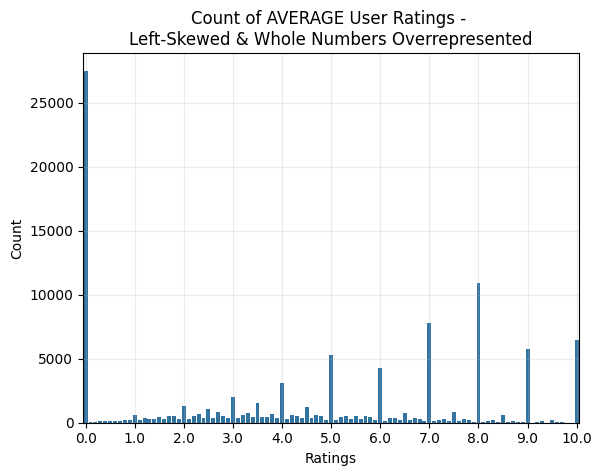

In [55]:
##PLOT
fig, ax = plt.subplots()

sns.countplot(data=ravg,  x='Book-Rating') 
plt.title("Count of AVERAGE User Ratings - \nLeft-Skewed & Whole Numbers Overrepresented")

ax.set_xticks(range(0, 110, 10))
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.grid(visible=True, which='major', axis='both', alpha = 0.25)

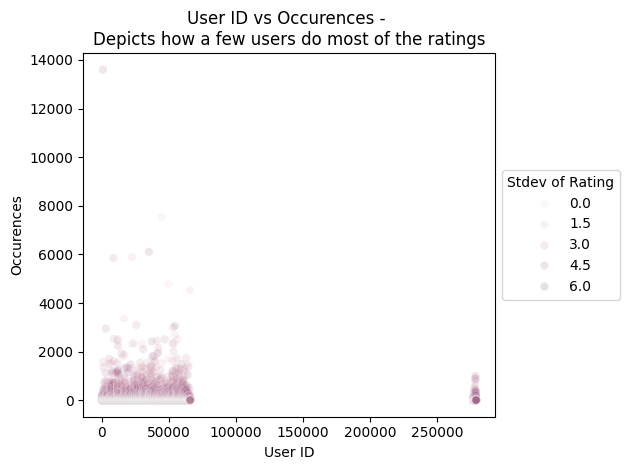

In [56]:
sns.scatterplot(data=ratings_df , x=ratings_df['User-ID'], y=(ratings_df.groupby('User-ID')['Book-Rating'].count()), hue=ratings_df.groupby('User-ID')['Book-Rating'].std(), alpha=0.15)

plt.ylabel('Occurences')
plt.xlabel('User ID')
plt.title('User ID vs Occurences - \nDepicts how a few users do most of the ratings')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Stdev of Rating')

plt.tight_layout()

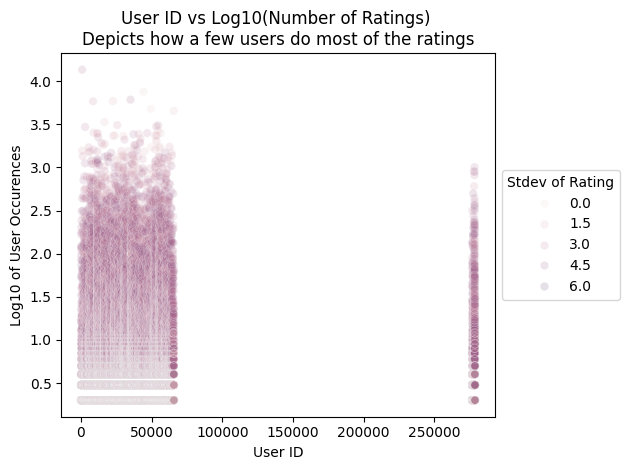

In [57]:
sns.scatterplot(data=ratings_df , x=ratings_df['User-ID'], y=np.log10(ratings_df.groupby('User-ID')['Book-Rating'].count()), hue=ratings_df.groupby('User-ID')['Book-Rating'].std(), alpha=0.15)
plt.ylabel('Log10 of User Occurences')
plt.xlabel('User ID')
plt.title('User ID vs Log10(Number of Ratings) \nDepicts how a few users do most of the ratings')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Stdev of Rating')

plt.tight_layout()

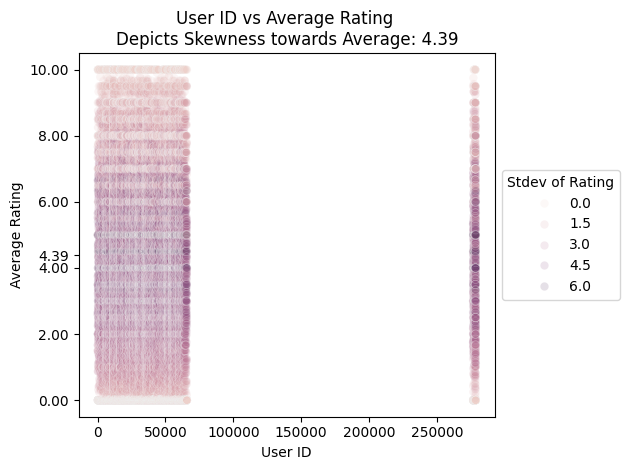

In [58]:
sns.scatterplot(data=ratings_df , x=ratings_df['User-ID'], y=ratings_df.groupby('User-ID')['Book-Rating'].mean(), hue=ratings_df.groupby('User-ID')['Book-Rating'].std(), alpha=0.15)

plt.ylabel('Average Rating')
plt.xlabel('User ID')
plt.title('User ID vs Average Rating \nDepicts Skewness towards Average: 4.39')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Stdev of Rating')
ax.set_yticks([0, 2, 4, 4.39, 6, 8, 10])

plt.tight_layout()

# Image Manipulation and Text Predictions

In [59]:
def flip_black_white_fast(image):
    flip_black_white_faststart_time = time.time()
    image_array = np.array(image)
    
    # Get the total number of pixels in the image
    total_pixels = image_array.size  # Height * Width

    # Set a pixel count threshold (50% of total pixels)
    white_threshold = total_pixels // 2

    # Count white pixels and stop early if they exceed the threshold
    white_pixels = np.sum(image_array > 128)

    # If more than 50% of the pixels are white, invert the image
    if white_pixels > white_threshold:
        inverted_image = ImageOps.invert(image)
        flip_black_white_fastend_time = time.time()
        print(f"flip_black_white_fast took {flip_black_white_fastend_time - flip_black_white_faststart_time:.2f} seconds - INVERSION")
        return inverted_image
    else:
        # Return the original image if white pixels are not dominant
        flip_black_white_fastend_time = time.time()
        print(f"flip_black_white_fast took {flip_black_white_fastend_time - flip_black_white_faststart_time:.2f} seconds - INVERSION")
        return image

In [60]:
def rescaleImage(image_path = '', min_size=2000, max_size = 3000, upscale_factor=2, downscale_factor=0.75):
    # Load the image
    original_image = Image.open(image_path)

    # Get original image size
    original_width, original_height = original_image.size
    #print(f"Original size of {image_path}: {original_width}x{original_height}")

    # Calculate new dimensions while maintaining the aspect ratio
    new_width, new_height = original_width, original_height

    # Decide whether to upscale or downscale
    if min(original_width, original_height) < min_size:
        # If the image is too small, upscale
        scale_factor = upscale_factor
        while min(new_width, new_height) < min_size:
            new_width = int(new_width * scale_factor)
            new_height = int(new_height * scale_factor)
            
            # Avoid overly large upscaling
            if max(new_width, new_height) > max_size:
                #print(f"Image is too large after upscaling, adjusting max size.")
                new_width = min(new_width, max_size)
                new_height = min(new_height, max_size)
                break
    else:
        # If the image exceeds the max size, downscale it
        if max(new_width, new_height) > max_size:
            scale_factor = downscale_factor
            while max(new_width, new_height) > max_size:
                new_width = int(new_width * scale_factor)
                new_height = int(new_height * scale_factor)

    # Calculate the scaling factor to maintain aspect ratio
    aspect_ratio = original_width / original_height

    # Maintain the aspect ratio
    if new_width > new_height:
        new_height = int(new_width / aspect_ratio)
    else:
        new_width = int(new_height * aspect_ratio)

    # Print new size after scaling
    #print(f"Rescaled size: {new_width}x{new_height}")

    # Rescale image using LANCZOS resampling for better quality
    image = original_image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    return image

In [61]:
def correctImage(images, save_dir=None):
    correctImagestart_time = time.time()
    '''
    Corrects the input images and saves rotated copies.
    Args:
    - images: List of image file paths (str)
    - save_dir: Directory to save rotated images. If None, saves in the same directory as the original images.
    '''
    corrected_images = []
    print(images)

    # Load the image
    for image_path in images:

        # Upscales the Image
        image = rescaleImage(image_path)

        # Enhance contrast
        image = ImageEnhance.Contrast(image)
        image = image.enhance(1.218)  # Increase contrast by a factor of 2

        # Denoise using median filter
        #image = image.filter(ImageFilter.MedianFilter(size=3))
    
        #Convert the Image to grayscale
        image = image.convert('L')

        # Invert if white predominates in the image
        image = flip_black_white_fast(image)

        #Black and White Image
        image = np.array(image)
        image = cv2.medianBlur(image, 3)




        image = Image.fromarray(image)

        # Ensure save_dir exists or use original image directory
        if save_dir is None:
            save_dir = os.path.dirname(image_path)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Get save path
        corrected_image_path = os.path.join(save_dir, os.path.basename(image_path))
        # Save the corrected image (optional)
        image.save(corrected_image_path)



        # Images to return
        corrected_images.append(corrected_image_path)

    
    correctImageend_time = time.time()
    print(f"correctImage took {correctImageend_time - correctImagestart_time:.2f} seconds")
    return corrected_images

In [62]:
def process_folder(folder_path):
    process_folderstart_time = time.time()
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        process_folderend_time = time.time()
        print(f"process_folder took {process_folderend_time - process_folderstart_time:.2f} seconds")
        return []
    
    # List all files in the folder (excluding subdirectories)
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    if len(files) == 0:
        print(f"No files found in {folder_path}.")
    else:
        print(f"Number of files: {len(files)}")
    
    process_folderend_time = time.time()
    print(f"process_folder took {process_folderend_time - process_folderstart_time:.2f} seconds")
    return files

In [63]:
# Set the path to the Tesseract executable (if not in PATH)
# Example for Windows:
pytesseract.pytesseract.tesseract_cmd = r"c:\Users\arado\Desktop\Full_Stack_Final_Project\tesseract ocr\tesseract.exe"

def detect_text(image_path, oem=1, psm=3):
    detect_textstart_time = time.time()
    """
    Detects text in the image file using Tesseract's LSTM engine.
    Args:
    - image_path: Path to the image file.
    - oem: OCR Engine Mode (default: 1 for LSTM).
    - psm: Page Segmentation Mode (default: 3 for automatic segmentation).

    OEM Modes:
    0: Original Tesseract OCR Engine.
    1: Neural net LSTM engine (most efficient and accurate for most cases).
    2: Combined mode (use both).
    3: Default (lets Tesseract decide).

    PSM (Page Segmentation Mode): This determines how Tesseract splits text. For example:
    3: Fully automatic page segmentation (most common).
    6: Assume a single uniform block of text.
    7: Treat the image as a single text line (good for single spine).
    """
    
    # Open the image file
    try:
        image = Image.open(image_path)
    except Exception as e:
        print(f"Error opening image: {e}")
        detect_textend_time = time.time()
        print(f"detect_text took {detect_textend_time - detect_textstart_time:.2f} seconds")   
        return None

    # Use pytesseract to extract text with specified engine mode and page segmentation mode
    custom_config = f'--oem {oem} --psm {psm}'
    detected_text = (image_path, pytesseract.image_to_string(image, config=custom_config))


    detect_textend_time = time.time()
    print(f"detect_text took {detect_textend_time - detect_textstart_time:.2f} seconds")   

    return detected_text

In [64]:
def rename_results_with_boundingBox(results, source, text_prediction_mode = False):

    # Regex to extract the file name
    pattern = r"[^\\]+$"
    match_filename = re.search(pattern, source)
    file_name = None
    if match_filename:
        file_name = match_filename.group(0)
        print(file_name)  # Output: home-library-tour-v0-wk0mm30medka.jpg

    # Regex to extract the file type
    pattern = r"\.\w+$"
    match_filetype = re.search(pattern, file_name)
    file_type = None
    if match_filetype:
        file_type = match_filetype.group(0)
        print(file_type)  # Output: .jpg, .png, etc


    #remove the file type from the end of the filename string
    file_name = file_name.removesuffix(file_type)
    


    for i, box in enumerate(results[0].boxes.xyxy):  # Access bounding boxes
        x_min, y_min, x_max, y_max = map(int, box)  # Convert to integers
    
        cropped_images_dir = "C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\runs\\detect\\predict\\crops\\Book"

        # Construct the new file name
        if i == 0:
            original_file = os.path.join(cropped_images_dir, f"{file_name}{file_type}")  # Existing name
            new_file_name = f"{file_name}_0_{x_min}_{y_min}_{x_max}_{y_max}{file_type}"  # New name
            new_file_path = os.path.join(cropped_images_dir, new_file_name)
        else:
            original_file = os.path.join(cropped_images_dir, f"{file_name}{i+1}{file_type}")  # Existing name
            new_file_name = f"{file_name}_{i}_{x_min}_{y_min}_{x_max}_{y_max}{file_type}"  # New name
            new_file_path = os.path.join(cropped_images_dir, new_file_name)
        
        # Rename the file
        if os.path.exists(original_file):  # Ensure the file exists
            if text_prediction_mode == True:
                os.rename(original_file, new_file_path)
            else:
                os.rename(original_file, new_file_path)
                print(f"Renamed: {original_file} -> {new_file_path}")
        else:
            print(f"File not found: {original_file}")

In [65]:
def get_spines(source, save=False):
    get_spinesstart_time = time.time()
    results = model.predict(source = source, #Location of item to predict {'filepath: such as .mp4 videos, or .jpg photos', '0 for webcam', 'local hosting ip adresses'}
                    save=save, #Save to the local prediction folder ( runs/detect/predict  )
                    conf = 0.1, #Threshold for confidence, best value obtained from f1 curve is 0.456, higher conf better for webcams/video ~0.80+
                    line_width = 2, #Text and Line Thickness
                    save_crop=save, #If set to TRUE It will automaticlly crop out the bounding box of predictions and save them to ( runs/detect/predict/crops )
                    save_txt=save, #Saves annotations in YOLO format to ( runs/detect/predict/labels )
                )
    
    rename_results_with_boundingBox(results=results, source=source)

    get_spinesend_time = time.time()
    print(f"get_spines took {get_spinesend_time - get_spinesstart_time:.2f} seconds")   

In [66]:
def read_photos(clear_input_folder = True, correctImages=False, folder_path = "C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\runs\\detect\\predict\\crops\\Book"):
    read_photosstart_time = time.time()
    # Specify your folder path here
    files = process_folder(folder_path)
    
    # Correct the images before OCR processing (if correctImages flag is set)
    if correctImages:
        corrected_images = correctImage([os.path.join(folder_path, picture) for picture in files])
    else:
        corrected_images = [os.path.join(folder_path, picture) for picture in files]

    # Tesseract OCR Call
    # Use ThreadPoolExecutor to parallelize the OCR process
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results_tesseract = []
        results_tesseract = list(executor.map(lambda img_path: detect_text(image_path=img_path), corrected_images))


    if clear_input_folder:
        # Remove the folder and its contents
        shutil.rmtree(folder_path)
        print(f"Folder {folder_path} and its contents have been deleted.")


    read_photosend_time = time.time()
    print(f"read_photos took {read_photosend_time - read_photosstart_time:.2f} seconds")   
    return results_tesseract

# Book Bounding Boxes

In [67]:
image_file_paths = [
        "C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\Bookshelf Images\\Test Images\\home-library-tour-v0-wk0mm30medka.jpg",
    ]


all_predicted_book_spines = []
def get_books(correctImages=True, cullNullTextImages = False, image_file_paths = []):
    # YOLO Model Inference   
    for item in image_file_paths:
        # Perform inference
        get_spines(item, save=True)     

    # Process each image independently
    books = read_photos(clear_input_folder=False, correctImages=correctImages)

    if books:  # Make sure books is not empty
        if cullNullTextImages:
            #Keep only books where book[1] is not an empty string
            books = [book for book in books if book[1] != '']
           
        return books
    else:
        print('No Books Detected')
        return None

all_predicted_book_spines = [get_books(correctImages=True, cullNullTextImages=False, image_file_paths=image_file_paths)]


image 1/1 C:\Users\arado\Desktop\Full_Stack_Final_Project\Bookshelf Images\Test Images\home-library-tour-v0-wk0mm30medka.jpg: 480x640 38 Books, 42.7ms
Speed: 2.0ms preprocess, 42.7ms inference, 80.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels
home-library-tour-v0-wk0mm30medka.jpg
.jpg
Renamed: C:\Users\arado\Desktop\Full_Stack_Final_Project\runs\detect\predict\crops\Book\home-library-tour-v0-wk0mm30medka.jpg -> C:\Users\arado\Desktop\Full_Stack_Final_Project\runs\detect\predict\crops\Book\home-library-tour-v0-wk0mm30medka_0_78_1446_685_1670.jpg
Renamed: C:\Users\arado\Desktop\Full_Stack_Final_Project\runs\detect\predict\crops\Book\home-library-tour-v0-wk0mm30medka2.jpg -> C:\Users\arado\Desktop\Full_Stack_Final_Project\runs\detect\predict\crops\Book\home-library-tour-v0-wk0mm30medka_1_703_814_1323_1017.jpg
Renamed: C:\Users\arado\Desktop\Full_Stack_Final_Project\runs\detect\predict\crops\Book\home-l

# Text Vectorizer

In [68]:
all_predicted_book_spines

[[('C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\runs\\detect\\predict\\crops\\Book\\home-library-tour-v0-wk0mm30medka_0_78_1446_685_1670.jpg',
   '=\n_~— -_- ———\n\noe p =\n\nlh oaeeety II HAGENT ed a)\ni\n\nKA@ SLAVOMTES PREVTY HAL 4\n\n», am\n\nMANE GATE\n\nOTers rape?’\n\n5 egg pee wore\nD — a\n\nr\nA) YORN SANDFORD Se gusas |\nVOCAL COROT TY TRC PRLS RET\n~OMCREY CONT TT RFRA a]\n\nCULT CORNTLIY Vel GORE =\nat) CANS + ENIITE am\n\nEF cuca J :\n\nt\n'),
  ('C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\runs\\detect\\predict\\crops\\Book\\home-library-tour-v0-wk0mm30medka_10_1992_820_2592_1016.jpg',
   '- .\nt\n= —™\n\nNIC HMOLA AG} ) ’ |\nNghe Rakes ff Nickelan Seah OW\n\nll\n\n7,2\n\nCAROL THOGINS CCAR OE INVER <)\n\nBX\n\n,\njms]\n\n1)\n\n~~\nis ou Fy Fm tot te\n». cei ee bh\n\nPL et\nae |\n\n"| YouNdi am SMACK\n4\n=\n\nao ss!\n\n—"~ ete ;\n'),
  ('C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\runs\\detect\\predict\\crops\\Book\\home-library-tour-v0-wk0mm30m

In [69]:
def compare_user_input(user_input, book_spines=[], heatmap=False, printEverything = True, showBook = False):
    # 1. Use TF-IDF Vectorizer to compute the embedding of the user input
    vectorizer = TfidfVectorizer()
    
    # Combine user_input with all predicted book spines for fitting the vectorizer
    texts = [user_input] + [pred_text[1] for book_spine in book_spines for pred_text in book_spine]

    # Fit and transform the texts to get the embeddings
    embeddings = vectorizer.fit_transform(texts).toarray()

    # User input embedding is the first embedding in the array
    user_input_embedding = embeddings[0]

    # 2. Process each bookshelf's predicted texts and compare with user input
    for idx, book_shelf in enumerate(book_spines):

        # 3. Extract the embeddings of the predicted bookshelf texts
        shelf_embeddings = embeddings[1 + sum(len(shelf) for shelf in book_spines[:idx]): 1 + sum(len(shelf) for shelf in book_spines[:idx + 1])]

        # 4. Calculate similarity between user input and bookshelf embeddings
        similarities = cosine_similarity([user_input_embedding], shelf_embeddings)
                

        # 5. Display the similarity results
        if printEverything:
            print(f"Comparing with Book Shelf {idx + 1}:")

            for i, text in enumerate(book_shelf):
                print(f'\n___________________________ \n{i + 1}')
                print(f"Predicted Text: {text}")
                print(f"Similarity with '{user_input}': {similarities[i]:.4f}\n")

        highest_score_index = similarities.argmax()
        print(f'Best Match for {user_input}: Score of : {similarities[0][highest_score_index]:.4f}, was - {book_spines[idx][highest_score_index]}')

        if heatmap:
            #visualize the similarities using a heatmap
            plt.figure(figsize=(5, 5))
            sns.heatmap(similarities.reshape(-1, 1), annot=False, cmap='rocket', robust=True)
            plt.title(f'Similarity Heatmap for Book Shelf {idx + 1}')
            plt.xticks([0], [user_input], rotation=45, ha='right')
            plt.show()


        if showBook:
            if similarities[0][highest_score_index] > 0:
                # Open the image
                filepath = book_spines[idx][highest_score_index][0]

                # Extract the file name and file type using a single regex
                match = re.search(r"([^\\]+)(\.\w+)$", filepath)
                if match:
                    file_name, file_type = match.groups()
                    print(file_name)  # e.g., home-library-tour-v0-wk0mm30medka.jpg
                    print(file_type)  # e.g., .jpg

                # Remove file type to extract the base name
                base_name = file_name.removesuffix(file_type)

                # Extract the main part of the name and coordinates in one step
                match = re.match(r"([^_]+)_(.+)", base_name)
                if match:
                    result, coordinates_str = match.groups()

                # Extract numbers and form the coordinates tuple
                coords = tuple(map(int, re.findall(r"\d+", coordinates_str)[1:]))
                print(coords)  # e.g., (1355, 1031, 1952, 1220)

                # Construct the image path
                image_path = f"C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\runs\\detect\\predict\\{result}{file_type}"

                # Open the image
                image = Image.open(image_path)

                # Draw the red box
                draw = ImageDraw.Draw(image)
                draw.rectangle(coords, outline='red', width = 2)
                

                # Define the text and its position
                text = user_input + ' - Score : 'f'{similarities[0][highest_score_index]:.4f}'

                try:
                    font = ImageFont.truetype("arial.ttf", size=20)  # Use a custom font
                except IOError:
                    font = ImageFont.load_default()  # Fallback to default font if not found

                # Calculate the text size
                text_bbox = font.getbbox(text)  # Get the bounding box of the text (left, top, right, bottom)
                text_width = text_bbox[2] - text_bbox[0]  # Calculate text width
                text_height = text_bbox[3] - text_bbox[1]  # Calculate text height

                # Define the rectangle coordinates
                padding = 5
                background_coords = (
                    coords[2]- text_width - padding, 
                    coords[3]- text_height - padding, 
                    coords[2],
                    coords[3] 
                )

                # Draw the solid background
                background_color = (255, 255, 255)  # White background
                draw.rectangle(background_coords, fill=background_color)

                # Draw the text over the rectangle
                text_color = (0, 0, 0)  # White text
                text_position = (coords[2]- text_width - padding, coords[3]- text_height - padding)  # Center text in the rectangle
                draw.text(text_position, text, fill=text_color, font=font)
                # Display the image
                roi = image.crop(coords)
                bw_image=image.convert('L').convert('RGB')
                # Paste the ROI back into the grayscale image
                bw_image.paste(roi, coords)
                
                bw_image.show()


Best Match for Narnia: Score of : 0.2005, was - ('C:\\Users\\arado\\Desktop\\Full_Stack_Final_Project\\runs\\detect\\predict\\crops\\Book\\home-library-tour-v0-wk0mm30medka_1_703_814_1323_1017.jpg', 'Syeecie\n\nNARNIA\nry |\nYOUR atonsin |\nHIDDEN BODES “iia! ef\nSHIKASTA — some aN\n\nSNOW RASH =: 0\n\nee i oe le\n\nEF CHILD \\eMlONic inte\n\n')


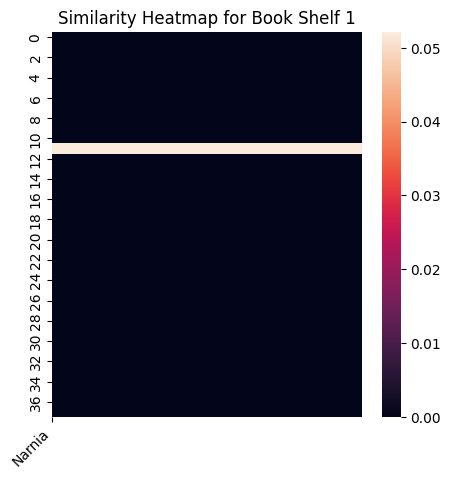

home-library-tour-v0-wk0mm30medka_1_703_814_1323_1017
.jpg
(703, 814, 1323, 1017)


In [70]:
# Example user input (could be any text like a book title or author)
user_input = [input()]

for i in user_input:
    # Assuming you've already populated 'all_predicted_book_spines' with predicted text
    compare_user_input(i, book_spines=all_predicted_book_spines, heatmap=True, printEverything = False, showBook=True)

# CLASS DECLARATIONS

In [71]:
II_c0 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c0.csv")
II_c1 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c1.csv")
II_c2 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c2.csv")
II_c3 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c3.csv")
II_c4 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c4.csv")
II_c5 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c5.csv")
II_c6 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c6.csv")
II_c7 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c7.csv")
II_c8 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c8.csv")
II_c9 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c9.csv")
II_c10 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c10.csv")
II_c11 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c11.csv")
II_c12 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c12.csv")
II_c13 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c13.csv")
II_c14 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c14.csv")
II_c15 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c15.csv")
II_c16 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c16.csv")
II_c17 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c17.csv")
II_c18 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c18.csv")
II_c19 = pd.read_csv("C://Users//arado//Desktop//Full_Stack_Final_Project//CollabFiltering//Item-Item_c19.csv")

II_cs = [II_c0, II_c1, II_c2, II_c2, II_c4, II_c5, II_c6, II_c7, II_c8, II_c9, II_c10, II_c11, II_c12, II_c13, II_c14, II_c15, II_c16, II_c17, II_c18, II_c19]

In [72]:
def get_ii_filters_with_leba(leba):
    """
    Find DataFrames from II_cs that contain the specified column name.
    
    Parameters:
    -----------
    leba 
        The column name to search for in the DataFrames
    
    Returns:
    --------
    list
        A list of DataFrames that contain the specified column
    """
    return [df for df in II_cs if leba in df['Label Encoded Book-Author'].to_list()]

x = get_ii_filters_with_leba(87167)
#x = get_ii_filters_with_leba(87167)
#
y = x[0].set_index('Label Encoded Book-Author').T
#
#
y = get_ii_filters_with_leba(34647.0)[0].set_index('Label Encoded Book-Author').T
y

Label Encoded Book-Author,162,254,406,415,454,490,491,502,508,515,...,86113,86182,86333,86814,86969,86977,87069,87087,87206,87210
162,1.000000e+00,-1.022438e-03,3.388594e-03,-5.491786e-13,-3.032938e-05,-5.142656e-04,1.064499e-03,-5.311614e-04,1.750154e-07,-1.910918e-03,...,1.226466e-10,2.271650e-15,2.488546e-03,1.888452e-03,-1.399749e-12,1.810645e-13,-3.479443e-04,-1.582962e-03,-4.904411e-12,-9.254765e-04
254,-1.022438e-03,1.000000e+00,2.158969e-04,1.133872e-12,-7.937091e-06,5.521120e-04,-8.439768e-04,8.659719e-03,-3.328368e-06,3.564288e-03,...,-1.533587e-10,-1.594746e-15,7.176557e-03,1.177785e-02,3.281071e-12,-3.338288e-13,-3.023772e-04,2.321419e-03,-9.991559e-13,2.340141e-03
406,3.388594e-03,2.158969e-04,1.000000e+00,-3.250780e-13,5.783293e-05,5.284526e-03,4.057890e-03,3.846782e-02,2.885479e-05,4.477122e-03,...,1.664888e-10,4.919248e-15,3.598320e-03,8.731649e-03,-5.155212e-12,2.698900e-13,2.443850e-03,1.374244e-03,-1.504936e-11,6.794635e-03
415,-5.491786e-13,1.133872e-12,-3.250780e-13,1.000000e+00,1.736421e-14,4.433390e-13,-2.758797e-13,1.961936e-12,1.009779e-14,2.879893e-12,...,-2.132362e-19,-2.104923e-24,1.044052e-12,-3.095933e-12,-2.386438e-22,-4.249626e-22,3.081507e-14,2.985638e-12,-3.960478e-21,-2.336746e-12
454,-3.032938e-05,-7.937091e-06,5.783293e-05,1.736421e-14,1.000000e+00,-3.832527e-05,8.931587e-05,3.312690e-04,-2.456225e-07,1.731977e-04,...,-2.526895e-12,-4.027093e-17,-3.022543e-06,1.306139e-04,4.991578e-14,-2.010908e-15,-1.417343e-05,3.931334e-05,3.652132e-14,2.689483e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86977,1.810645e-13,-3.338288e-13,2.698900e-13,-4.249626e-22,-2.010908e-15,2.641885e-13,9.034535e-13,4.362580e-13,2.745357e-15,-5.555974e-13,...,6.640196e-20,1.955314e-24,-8.370374e-14,-5.299976e-13,-6.149236e-22,1.000000e+00,-1.066776e-14,-7.951992e-13,-3.771793e-21,2.475497e-13
87069,-3.479443e-04,-3.023772e-04,2.443850e-03,3.081507e-14,-1.417343e-05,1.502052e-03,-3.478361e-04,9.432717e-03,3.361778e-05,-9.611843e-04,...,4.918110e-12,2.691439e-16,7.026552e-03,-1.069915e-03,2.339139e-14,-1.066776e-14,1.000000e+00,-8.534159e-04,-1.738747e-12,-9.998029e-04
87087,-1.582962e-03,2.321419e-03,1.374244e-03,2.985638e-12,3.931334e-05,-4.034702e-04,-5.454214e-04,1.719315e-02,-2.351332e-05,1.297528e-02,...,-5.360867e-10,-9.750339e-15,7.341382e-03,3.613908e-03,1.031228e-11,-7.951992e-13,-8.534159e-04,1.000000e+00,1.347844e-11,4.481503e-03
87206,-4.904411e-12,-9.991559e-13,-1.504936e-11,-3.960478e-21,3.652132e-14,-1.585543e-11,-1.120437e-11,3.018766e-11,-2.939290e-13,-2.336651e-12,...,-9.220783e-19,-5.480062e-23,-1.118300e-11,3.942934e-11,5.240119e-20,-3.771793e-21,-1.738747e-12,1.347844e-11,1.000000e+00,2.725843e-11


In [73]:
def updated_itemBCFRatingPredict(data=pd.Series, l = float()):
    '''
    1. take Series data from itemBasedCollabFilter method:
    2. loop through the books which were highly correlated with input book from prev method
    3. Return the list of numBooks number of books
    '''
    global b
    
    ret_list = []
    for s in data.index.to_list():

        #print('Current s value: ' + s)

        L = b.where(b['Label Encoded Book-Author'] == int(s))['AuthorTitleString'].dropna()
        #print('Current L Value: ', L)

        cor = L.iloc[0]
        #print('Current c Value: ', cor)

        ret_list.append(cor)
    
    return ret_list

numReturns = 5
d = y[34647.0].sort_values(ascending=False)[:numReturns+1]
print(d)
g = updated_itemBCFRatingPredict(data = d)

print(g)

34647    1.000000
34966    0.140722
83916    0.140267
7912     0.139990
21092    0.132046
50753    0.131673
Name: 34647, dtype: float64
["Harry Potter and the Sorcerer's Stone (Urdu Edition) J. K. Rowling", 'Harry Potter and the Prisoner of Azkaban (Harry Potter) J.K. Rowling', 'Dead Angler (Loon Lake Fishing Mysteries) Victoria Houston', 'Sister of the Bride (rack) (Cleary Reissue) Beverly Cleary', "Heberden's Seat Douglas Clark", 'Midnight Rambler (Silhouette Desire 379) Linda Barlow']


In [79]:
# Function to search books by title
def user_search_for_books(query):
    # Case-insensitive search
    books = b[b['AuthorTitleString'].str.contains(query, case=False, na=False)]
    return books

def user_book_query():
    # Example usage
    user_query = input("Enter book title or keyword: ")

    officialBookNames = user_search_for_books(user_query)
    if not officialBookNames.empty:
        print(f'Number of Matches found for "{user_query}": {len(officialBookNames)}\n')
        print("Books Found:")

        foundSpecificBook = False
        i=0
        while not foundSpecificBook:
            print(officialBookNames.iloc[i]['AuthorTitleString'])
            nextbook = input('Was this the book you were looking for Y/N?')
            if nextbook == 'Y':
                foundSpecificBook = True
                return officialBookNames.iloc[i]['AuthorTitleString']
            
            
            else:
                i+=1
    else:
        print("No books found matching your query.")
        return None


book_name = user_book_query()

index = title_author[title_author['AuthorTitleString'] == book_name]
#print(index)

LEBA = set(b.where(b['AuthorTitleString'] == book_name)['Label Encoded Book-Author'].dropna()).pop()
#print(LEBA)


y = get_ii_filters_with_leba(LEBA)[0].set_index('Label Encoded Book-Author').T
#print(y[LEBA])

numReturns = 5
print(f'Top {numReturns} Similar Reads to ({book_name}) ---> {updated_itemBCFRatingPredict(data = y[LEBA].sort_values(ascending=False)[1:numReturns+1])}')

Number of Matches found for "Frosty": 16

Books Found:
Frosty the Snowman (A Little golden book) Annie North Bedford
Top 5 Similar Reads to (Frosty the Snowman (A Little golden book) Annie North Bedford) ---> ['Kermit, Save the Swamp! (Little Golden Book) Richard Chevat', 'Barbie the Big Splash: The Big Splash (Little Golden Book) Barbara Slate', "Polly's Pet (Little Golden Book) Lucille Hammond", 'The Special Sleepover (The Barbie) FRANCINE HUGHES', "Pierrot's ABC Garden (A Little Golden Book) Anita Lobel"]
